In [22]:
import os
import random
import torch
import timm
import numpy as np
from torchvision import models
from torch import nn, optim
from torch.optim import lr_scheduler
from torchsummary import summary

from data_loading import Data
from model_training import train_model, plot_training_history
from model_testing import test_model, plot_examples

In [ ]:
random_seed = 42
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [25]:
data_dir = 'C:/Users/weron/Pulpit/sem1/dl/proj1/archive'

In [26]:
data = Data(data_dir)

# VIT


In [27]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [28]:
model = timm.create_model(
    "vit_tiny_patch16_224",  # Base architecture
    pretrained=False,        # Train from scratch
    num_classes=10,          # CINIC-10 classes
    img_size=32,             # Input size
    patch_size=4,            # Smaller patches for 32x32 (4x4 patches → 8x8 grid)
    embed_dim=192,           # Reduce embedding dim (original: 192 for tiny)
    depth=12,                # Number of layers
    num_heads=3,             # Attention heads
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [29]:
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 192, 8, 8]           9,408
          Identity-2              [-1, 64, 192]               0
        PatchEmbed-3              [-1, 64, 192]               0
           Dropout-4              [-1, 65, 192]               0
          Identity-5              [-1, 65, 192]               0
          Identity-6              [-1, 65, 192]               0
         LayerNorm-7              [-1, 65, 192]             384
            Linear-8              [-1, 65, 576]         111,168
          Identity-9            [-1, 3, 65, 64]               0
         Identity-10            [-1, 3, 65, 64]               0
           Linear-11              [-1, 65, 192]          37,056
          Dropout-12              [-1, 65, 192]               0
        Attention-13              [-1, 65, 192]               0
         Identity-14              [-1, 

In [30]:
sample_input = torch.randn(1, 3, 32, 32).to(device)
model.eval()
with torch.no_grad():
    output = model(sample_input)
print(output.shape)

torch.Size([1, 10])


In [31]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.8833 Acc: 0.2970
valid Loss: 1.7451 Acc: 0.3561

Epoch 1/19
----------
train Loss: 1.6727 Acc: 0.3821
valid Loss: 1.6632 Acc: 0.3870

Epoch 2/19
----------
train Loss: 1.5718 Acc: 0.4200
valid Loss: 1.5255 Acc: 0.4327

Epoch 3/19
----------
train Loss: 1.4969 Acc: 0.4457
valid Loss: 1.4768 Acc: 0.4545

Epoch 4/19
----------
train Loss: 1.4437 Acc: 0.4645
valid Loss: 1.4657 Acc: 0.4569

Epoch 5/19
----------
train Loss: 1.4003 Acc: 0.4809
valid Loss: 1.4003 Acc: 0.4813

Epoch 6/19
----------
train Loss: 1.3657 Acc: 0.4956
valid Loss: 1.3843 Acc: 0.4889

Epoch 7/19
----------
train Loss: 1.2493 Acc: 0.5383
valid Loss: 1.2713 Acc: 0.5320

Epoch 8/19
----------
train Loss: 1.2246 Acc: 0.5485
valid Loss: 1.2644 Acc: 0.5356

Epoch 9/19
----------
train Loss: 1.2112 Acc: 0.5544
valid Loss: 1.2481 Acc: 0.5424

Epoch 10/19
----------
train Loss: 1.1986 Acc: 0.5589
valid Loss: 1.2432 Acc: 0.5431

Epoch 11/19
----------
train Loss: 1.1887 Acc: 0.5634
valid Loss

In [32]:
title = 'VIT'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

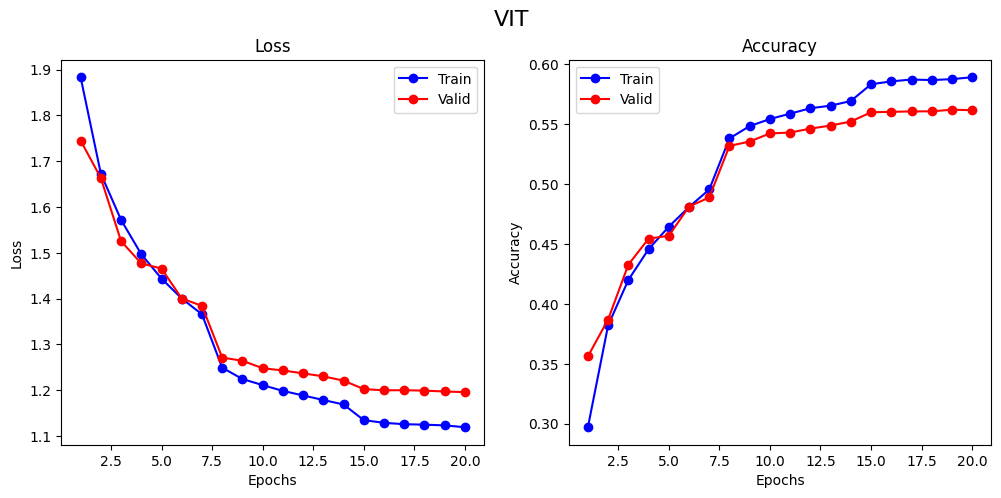

In [33]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [34]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.5604

Classification Report:
              precision    recall  f1-score   support

    airplane       0.68      0.63      0.66      9000
  automobile       0.60      0.59      0.59      9000
        bird       0.52      0.50      0.51      9000
         cat       0.42      0.39      0.40      9000
        deer       0.50      0.47      0.48      9000
         dog       0.41      0.40      0.41      9000
        frog       0.63      0.74      0.68      9000
       horse       0.61      0.64      0.63      9000
        ship       0.62      0.69      0.65      9000
       truck       0.57      0.57      0.57      9000

    accuracy                           0.56     90000
   macro avg       0.56      0.56      0.56     90000
weighted avg       0.56      0.56      0.56     90000



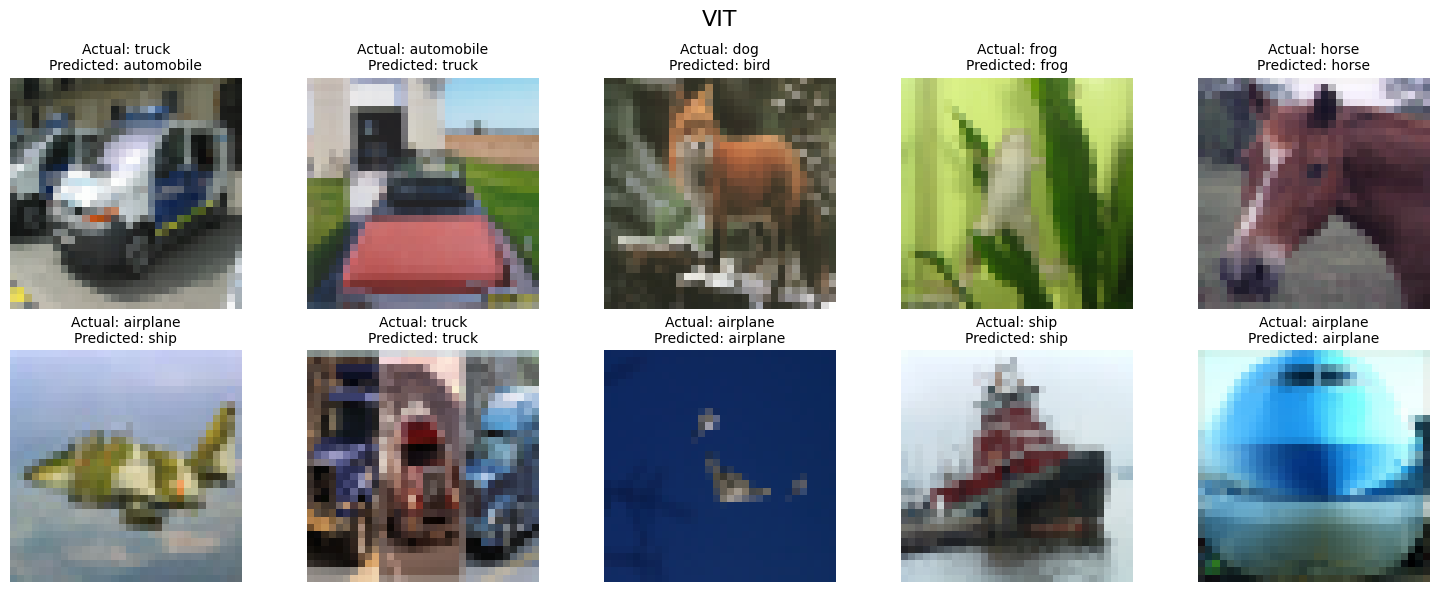

In [35]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Adam


### VIT Adam


In [36]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [37]:
model = timm.create_model(     "vit_tiny_patch16_224",     pretrained=False,     num_classes=10,     img_size=32,     patch_size=4,     embed_dim=192,     depth=12,     num_heads=3, ).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [38]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.0784 Acc: 0.2127
valid Loss: 2.0764 Acc: 0.2111

Epoch 1/19
----------
train Loss: 2.0110 Acc: 0.2425
valid Loss: 1.9564 Acc: 0.2617

Epoch 2/19
----------
train Loss: 1.9872 Acc: 0.2516
valid Loss: 1.9688 Acc: 0.2559

Epoch 3/19
----------
train Loss: 1.9580 Acc: 0.2630
valid Loss: 1.9612 Acc: 0.2661

Epoch 4/19
----------
train Loss: 1.9390 Acc: 0.2744
valid Loss: 1.9329 Acc: 0.2783

Epoch 5/19
----------
train Loss: 1.9201 Acc: 0.2844
valid Loss: 1.9619 Acc: 0.2655

Epoch 6/19
----------
train Loss: 1.9465 Acc: 0.2736
valid Loss: 1.9872 Acc: 0.2630

Epoch 7/19
----------
train Loss: 1.9191 Acc: 0.2845
valid Loss: 1.9106 Acc: 0.2876

Epoch 8/19
----------
train Loss: 1.8993 Acc: 0.2930
valid Loss: 1.8963 Acc: 0.2929

Epoch 9/19
----------
train Loss: 1.8849 Acc: 0.2987
valid Loss: 1.8862 Acc: 0.2964

Epoch 10/19
----------
train Loss: 1.8693 Acc: 0.3042
valid Loss: 1.8739 Acc: 0.3019

Epoch 11/19
----------
train Loss: 1.8589 Acc: 0.3061
valid Loss

In [39]:
title = 'VIT_Adam'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

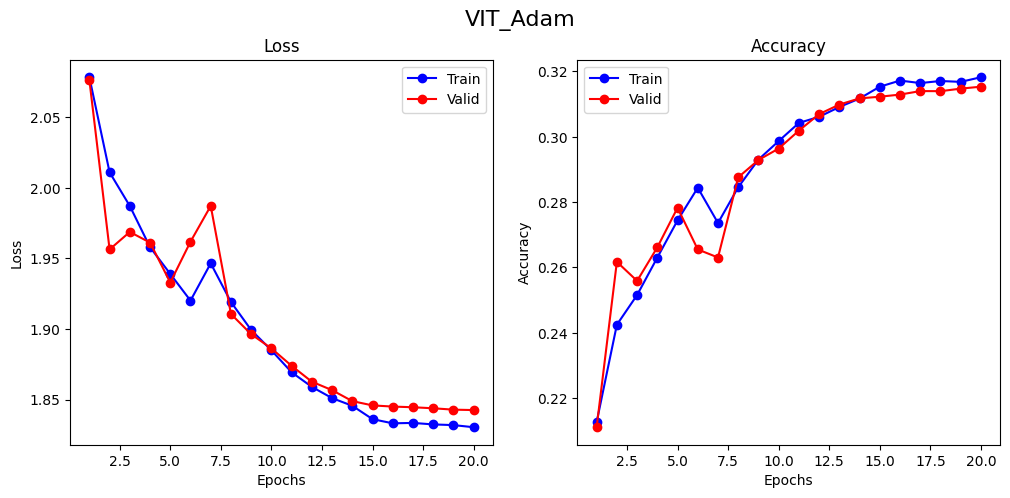

In [40]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [41]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.3124

Classification Report:
              precision    recall  f1-score   support

    airplane       0.45      0.44      0.45      9000
  automobile       0.31      0.38      0.34      9000
        bird       0.28      0.22      0.25      9000
         cat       0.21      0.16      0.18      9000
        deer       0.28      0.14      0.19      9000
         dog       0.24      0.22      0.23      9000
        frog       0.32      0.51      0.39      9000
       horse       0.30      0.32      0.31      9000
        ship       0.37      0.36      0.37      9000
       truck       0.30      0.37      0.33      9000

    accuracy                           0.31     90000
   macro avg       0.31      0.31      0.30     90000
weighted avg       0.31      0.31      0.30     90000



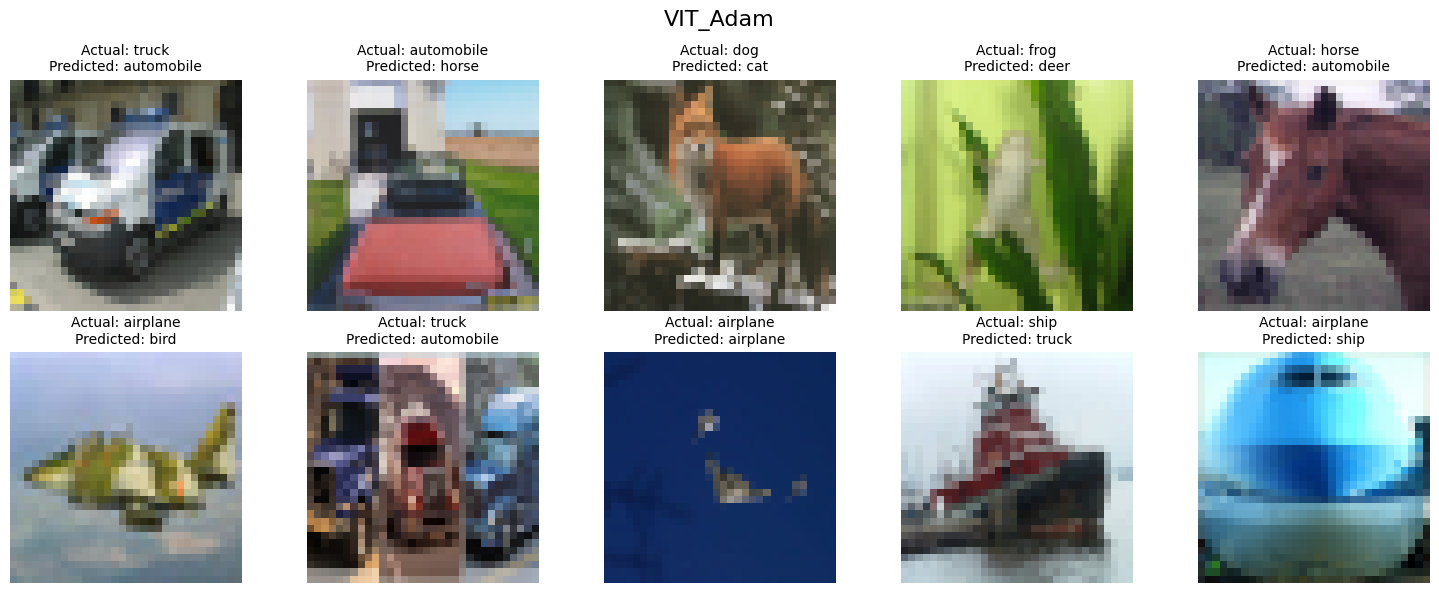

In [42]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VIT ADAM wd = 0.001


In [43]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [44]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [45]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.8535 Acc: 0.3027
valid Loss: 1.7100 Acc: 0.3657

Epoch 1/19
----------
train Loss: 1.6484 Acc: 0.3896
valid Loss: 1.5893 Acc: 0.4154

Epoch 2/19
----------
train Loss: 1.5878 Acc: 0.4120
valid Loss: 1.5664 Acc: 0.4221

Epoch 3/19
----------
train Loss: 1.5478 Acc: 0.4274
valid Loss: 1.5452 Acc: 0.4270

Epoch 4/19
----------
train Loss: 1.5215 Acc: 0.4368
valid Loss: 1.5193 Acc: 0.4409

Epoch 5/19
----------
train Loss: 1.5047 Acc: 0.4443
valid Loss: 1.5279 Acc: 0.4372

Epoch 6/19
----------
train Loss: 1.4917 Acc: 0.4487
valid Loss: 1.4772 Acc: 0.4500

Epoch 7/19
----------
train Loss: 1.4109 Acc: 0.4796
valid Loss: 1.4144 Acc: 0.4773

Epoch 8/19
----------
train Loss: 1.3982 Acc: 0.4831
valid Loss: 1.4051 Acc: 0.4832

Epoch 9/19
----------
train Loss: 1.3915 Acc: 0.4873
valid Loss: 1.4172 Acc: 0.4785

Epoch 10/19
----------
train Loss: 1.3869 Acc: 0.4876
valid Loss: 1.3984 Acc: 0.4853

Epoch 11/19
----------
train Loss: 1.3812 Acc: 0.4909
valid Loss

In [46]:
title = 'VIT_Adam_WG0001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

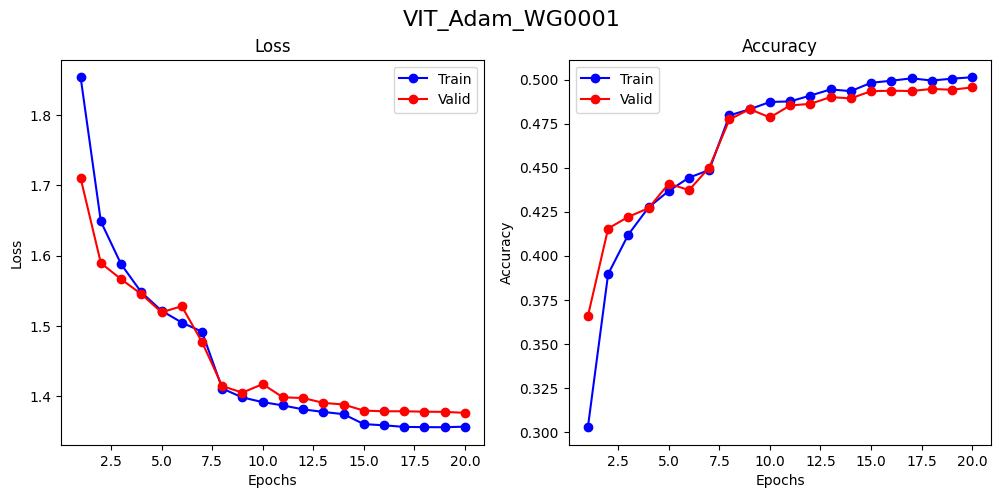

In [47]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [48]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.4932

Classification Report:
              precision    recall  f1-score   support

    airplane       0.60      0.59      0.60      9000
  automobile       0.53      0.56      0.55      9000
        bird       0.42      0.39      0.40      9000
         cat       0.36      0.36      0.36      9000
        deer       0.43      0.35      0.39      9000
         dog       0.37      0.29      0.32      9000
        frog       0.57      0.68      0.62      9000
       horse       0.54      0.61      0.57      9000
        ship       0.55      0.58      0.57      9000
       truck       0.51      0.51      0.51      9000

    accuracy                           0.49     90000
   macro avg       0.49      0.49      0.49     90000
weighted avg       0.49      0.49      0.49     90000



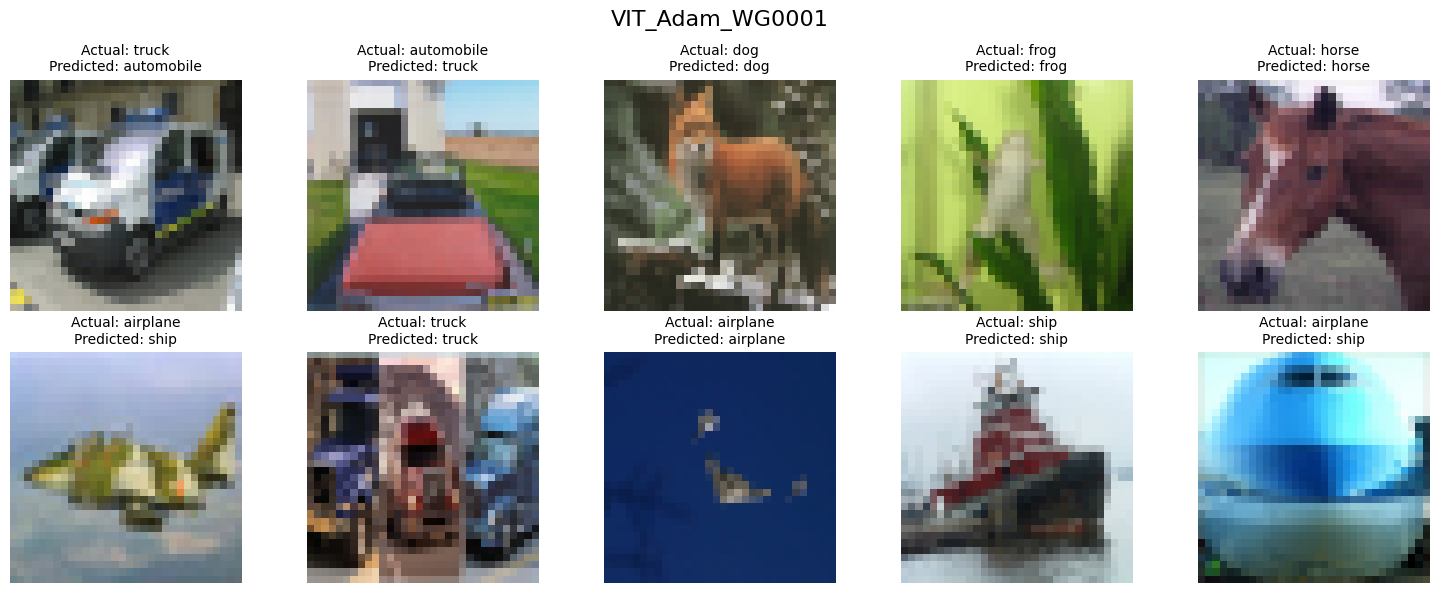

In [49]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VIT ADAM wd = 0.01


In [50]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [51]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [52]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.9916 Acc: 0.2481
valid Loss: 1.9065 Acc: 0.2717

Epoch 1/19
----------
train Loss: 1.8451 Acc: 0.2964
valid Loss: 1.7808 Acc: 0.3207

Epoch 2/19
----------
train Loss: 1.7865 Acc: 0.3217
valid Loss: 1.7594 Acc: 0.3357

Epoch 3/19
----------
train Loss: 1.7571 Acc: 0.3373
valid Loss: 1.7744 Acc: 0.3357

Epoch 4/19
----------
train Loss: 1.7404 Acc: 0.3493
valid Loss: 1.7371 Acc: 0.3513

Epoch 5/19
----------
train Loss: 1.7316 Acc: 0.3536
valid Loss: 1.7632 Acc: 0.3526

Epoch 6/19
----------
train Loss: 1.7258 Acc: 0.3585
valid Loss: 1.7084 Acc: 0.3596

Epoch 7/19
----------
train Loss: 1.6573 Acc: 0.3836
valid Loss: 1.6538 Acc: 0.3854

Epoch 8/19
----------
train Loss: 1.6479 Acc: 0.3885
valid Loss: 1.6467 Acc: 0.3882

Epoch 9/19
----------
train Loss: 1.6414 Acc: 0.3906
valid Loss: 1.6576 Acc: 0.3814

Epoch 10/19
----------
train Loss: 1.6365 Acc: 0.3930
valid Loss: 1.6412 Acc: 0.3880

Epoch 11/19
----------
train Loss: 1.6357 Acc: 0.3907
valid Loss

In [53]:
title = 'VIT_Adam_WG001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

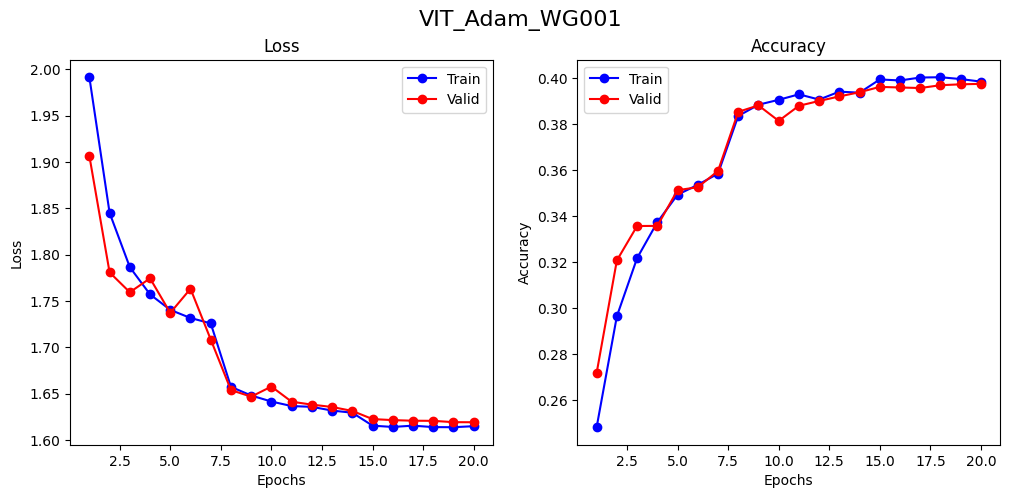

In [54]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [55]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.3992

Classification Report:
              precision    recall  f1-score   support

    airplane       0.51      0.54      0.52      9000
  automobile       0.42      0.52      0.47      9000
        bird       0.30      0.26      0.28      9000
         cat       0.30      0.26      0.28      9000
        deer       0.34      0.26      0.29      9000
         dog       0.29      0.23      0.26      9000
        frog       0.42      0.58      0.49      9000
       horse       0.43      0.50      0.46      9000
        ship       0.47      0.46      0.47      9000
       truck       0.41      0.38      0.40      9000

    accuracy                           0.40     90000
   macro avg       0.39      0.40      0.39     90000
weighted avg       0.39      0.40      0.39     90000



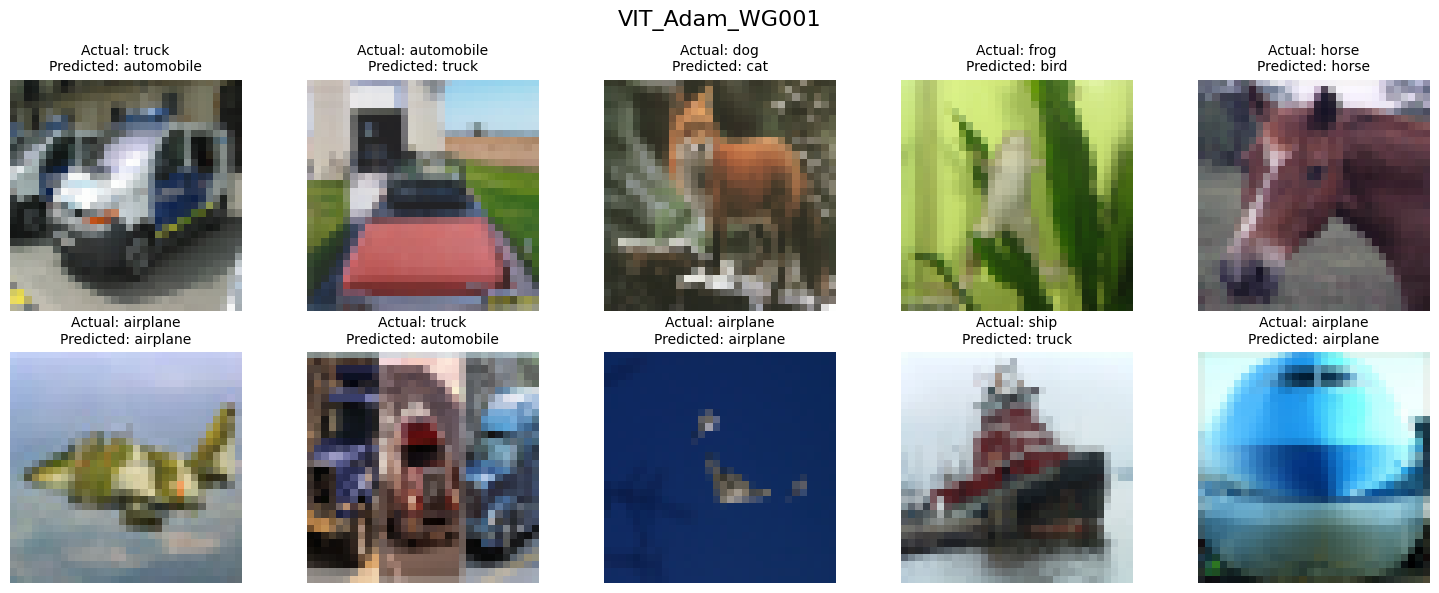

In [56]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Weight decay


### VIT SGD wd = 0.001


In [57]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [58]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [59]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.8716 Acc: 0.3011
valid Loss: 1.7827 Acc: 0.3407

Epoch 1/19
----------
train Loss: 1.6699 Acc: 0.3825
valid Loss: 1.5930 Acc: 0.4122

Epoch 2/19
----------
train Loss: 1.5775 Acc: 0.4180
valid Loss: 1.5727 Acc: 0.4164

Epoch 3/19
----------
train Loss: 1.5126 Acc: 0.4385
valid Loss: 1.4873 Acc: 0.4511

Epoch 4/19
----------
train Loss: 1.4637 Acc: 0.4588
valid Loss: 1.4414 Acc: 0.4654

Epoch 5/19
----------
train Loss: 1.4256 Acc: 0.4722
valid Loss: 1.4389 Acc: 0.4704

Epoch 6/19
----------
train Loss: 1.3983 Acc: 0.4838
valid Loss: 1.4035 Acc: 0.4809

Epoch 7/19
----------
train Loss: 1.2935 Acc: 0.5221
valid Loss: 1.3093 Acc: 0.5166

Epoch 8/19
----------
train Loss: 1.2758 Acc: 0.5298
valid Loss: 1.2959 Acc: 0.5215

Epoch 9/19
----------
train Loss: 1.2644 Acc: 0.5354
valid Loss: 1.3023 Acc: 0.5215

Epoch 10/19
----------
train Loss: 1.2543 Acc: 0.5371
valid Loss: 1.2849 Acc: 0.5267

Epoch 11/19
----------
train Loss: 1.2461 Acc: 0.5399
valid Loss

In [60]:
title = 'VIT_SGD_WD0001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

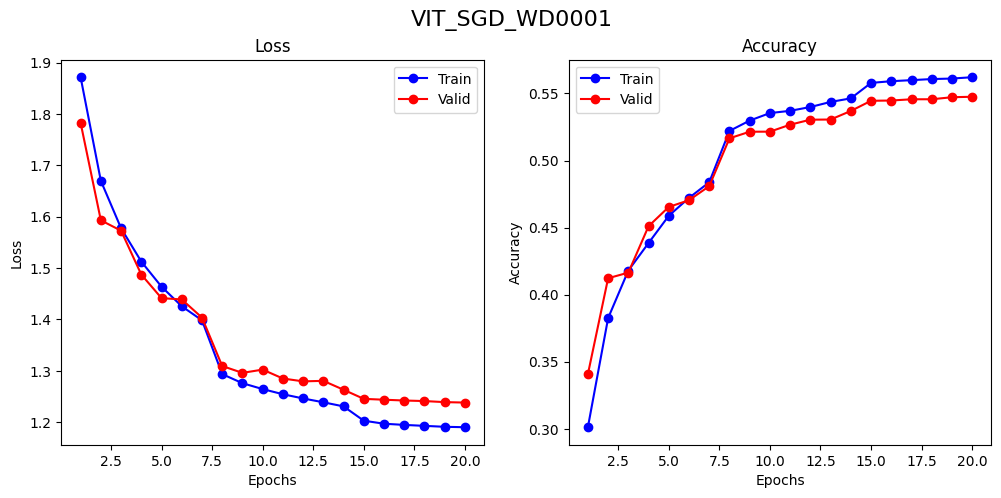

In [61]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [62]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.5454

Classification Report:
              precision    recall  f1-score   support

    airplane       0.66      0.62      0.64      9000
  automobile       0.57      0.60      0.59      9000
        bird       0.49      0.48      0.49      9000
         cat       0.41      0.38      0.40      9000
        deer       0.47      0.47      0.47      9000
         dog       0.42      0.35      0.38      9000
        frog       0.64      0.70      0.67      9000
       horse       0.58      0.64      0.61      9000
        ship       0.60      0.66      0.63      9000
       truck       0.56      0.55      0.56      9000

    accuracy                           0.55     90000
   macro avg       0.54      0.55      0.54     90000
weighted avg       0.54      0.55      0.54     90000



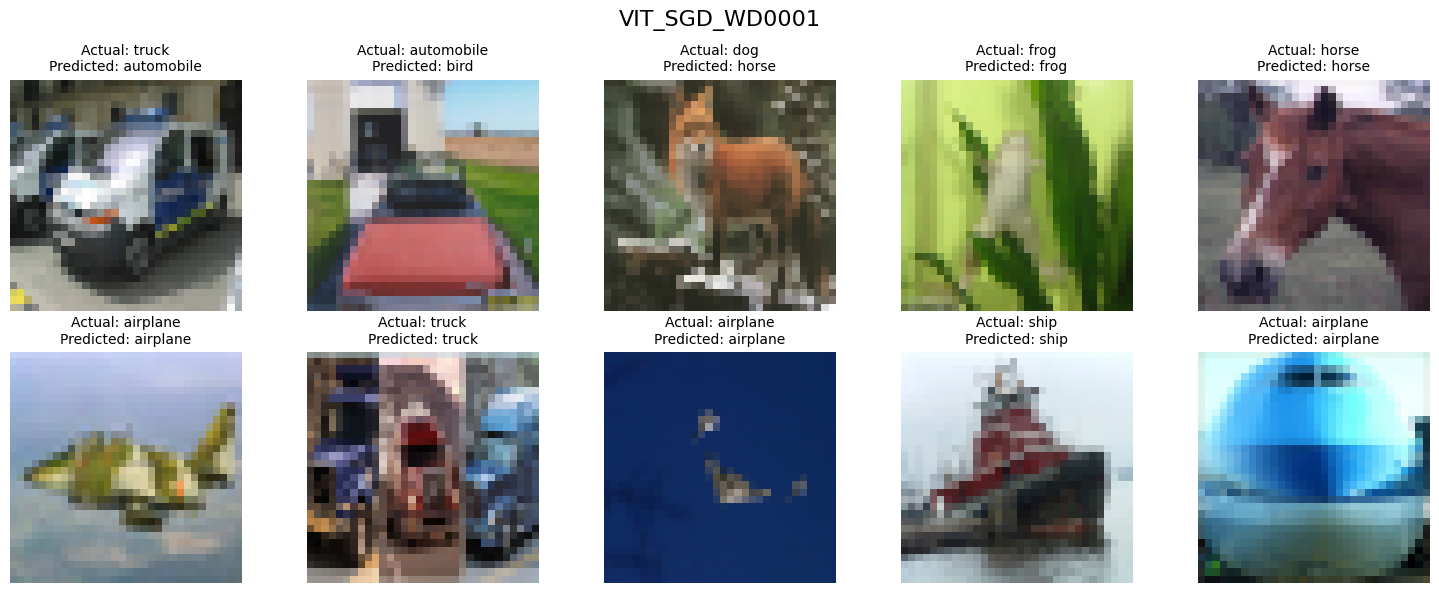

In [63]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VIT SGD wd = 0.01


In [64]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [65]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [66]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.8940 Acc: 0.2927
valid Loss: 1.8428 Acc: 0.3117

Epoch 1/19
----------
train Loss: 1.7379 Acc: 0.3568
valid Loss: 1.6709 Acc: 0.3833

Epoch 2/19
----------
train Loss: 1.6880 Acc: 0.3788
valid Loss: 1.6619 Acc: 0.3916

Epoch 3/19
----------
train Loss: 1.6720 Acc: 0.3835
valid Loss: 1.6607 Acc: 0.3908

Epoch 4/19
----------
train Loss: 1.6810 Acc: 0.3816
valid Loss: 1.6599 Acc: 0.3859

Epoch 5/19
----------
train Loss: 1.6748 Acc: 0.3837
valid Loss: 1.7357 Acc: 0.3597

Epoch 6/19
----------
train Loss: 1.6833 Acc: 0.3765
valid Loss: 1.7789 Acc: 0.3496

Epoch 7/19
----------
train Loss: 1.5842 Acc: 0.4160
valid Loss: 1.5801 Acc: 0.4167

Epoch 8/19
----------
train Loss: 1.5694 Acc: 0.4208
valid Loss: 1.5718 Acc: 0.4208

Epoch 9/19
----------
train Loss: 1.5655 Acc: 0.4229
valid Loss: 1.5753 Acc: 0.4225

Epoch 10/19
----------
train Loss: 1.5620 Acc: 0.4227
valid Loss: 1.5838 Acc: 0.4146

Epoch 11/19
----------
train Loss: 1.5595 Acc: 0.4218
valid Loss

In [67]:
title = 'VIT_SGD_WD001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

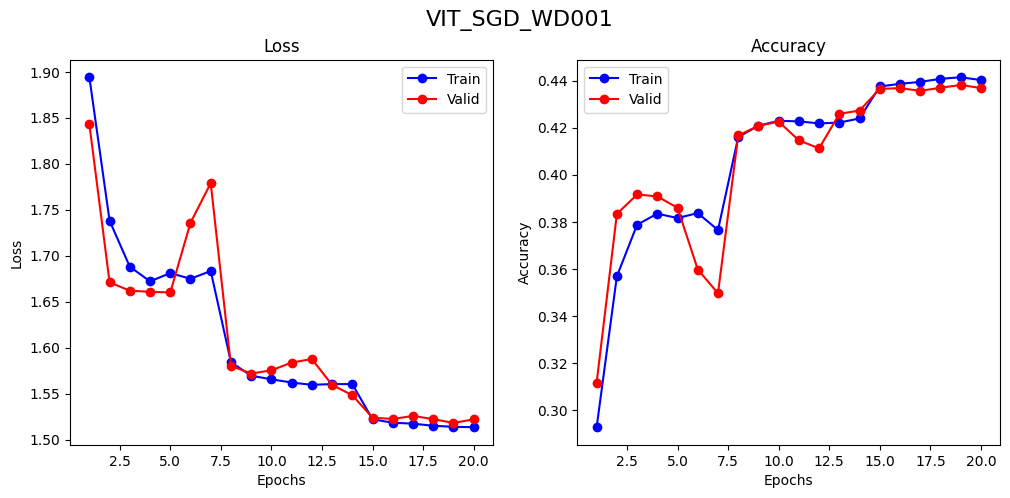

In [68]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [69]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.4357

Classification Report:
              precision    recall  f1-score   support

    airplane       0.56      0.57      0.56      9000
  automobile       0.47      0.51      0.49      9000
        bird       0.36      0.33      0.34      9000
         cat       0.31      0.28      0.30      9000
        deer       0.38      0.31      0.34      9000
         dog       0.34      0.23      0.27      9000
        frog       0.50      0.62      0.55      9000
       horse       0.45      0.54      0.49      9000
        ship       0.47      0.52      0.50      9000
       truck       0.44      0.43      0.44      9000

    accuracy                           0.44     90000
   macro avg       0.43      0.44      0.43     90000
weighted avg       0.43      0.44      0.43     90000



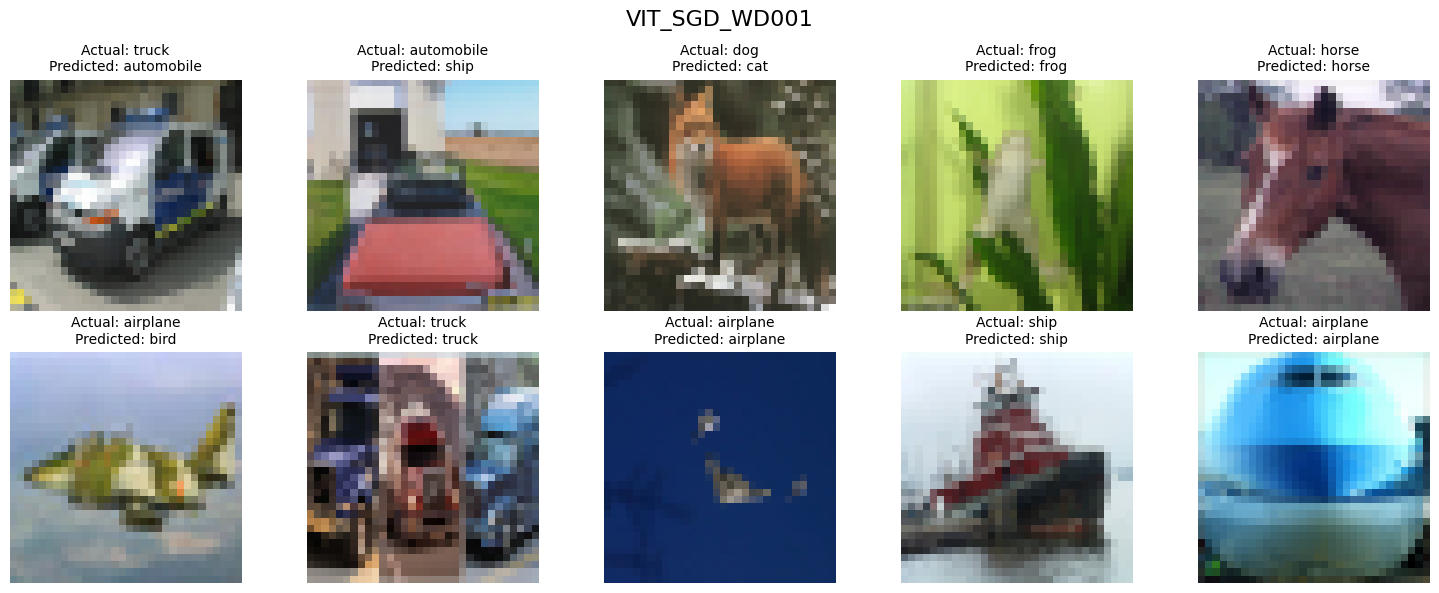

In [70]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VIT SGD wd = 0.1


In [71]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [72]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.1)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [73]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.0906 Acc: 0.2200
valid Loss: 2.1221 Acc: 0.2078

Epoch 1/19
----------
train Loss: 2.1226 Acc: 0.1969
valid Loss: 2.0995 Acc: 0.2041

Epoch 2/19
----------
train Loss: 2.1058 Acc: 0.2010
valid Loss: 2.1395 Acc: 0.1884

Epoch 3/19
----------
train Loss: 2.1041 Acc: 0.2015
valid Loss: 2.0979 Acc: 0.2016

Epoch 4/19
----------
train Loss: 2.1045 Acc: 0.2028
valid Loss: 2.1002 Acc: 0.2120

Epoch 5/19
----------
train Loss: 2.1040 Acc: 0.2024
valid Loss: 2.0920 Acc: 0.2087

Epoch 6/19
----------
train Loss: 2.1047 Acc: 0.2029
valid Loss: 2.1273 Acc: 0.1944

Epoch 7/19
----------
train Loss: 2.0848 Acc: 0.2089
valid Loss: 2.0817 Acc: 0.2114

Epoch 8/19
----------
train Loss: 2.0846 Acc: 0.2079
valid Loss: 2.0770 Acc: 0.2075

Epoch 9/19
----------
train Loss: 2.0845 Acc: 0.2097
valid Loss: 2.0760 Acc: 0.2138

Epoch 10/19
----------
train Loss: 2.0810 Acc: 0.2086
valid Loss: 2.0766 Acc: 0.2032

Epoch 11/19
----------
train Loss: 2.0754 Acc: 0.2060
valid Loss

In [74]:
title = 'VIT_SGD_WD01'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

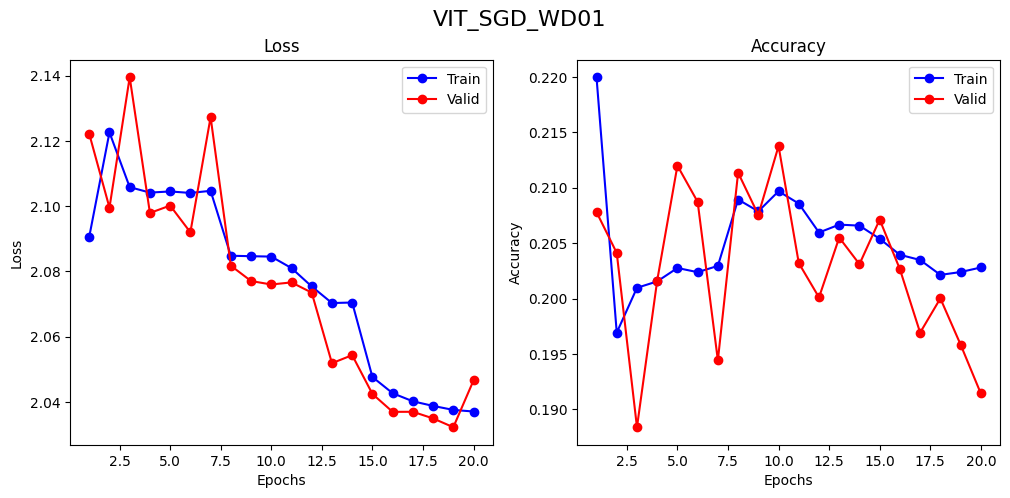

In [75]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [76]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.2137

Classification Report:
              precision    recall  f1-score   support

    airplane       0.27      0.72      0.39      9000
  automobile       0.18      0.15      0.16      9000
        bird       0.00      0.00      0.00      9000
         cat       0.15      0.15      0.15      9000
        deer       0.00      0.00      0.00      9000
         dog       0.00      0.00      0.00      9000
        frog       0.22      0.73      0.34      9000
       horse       0.15      0.16      0.15      9000
        ship       0.16      0.01      0.02      9000
       truck       0.20      0.22      0.21      9000

    accuracy                           0.21     90000
   macro avg       0.13      0.21      0.14     90000
weighted avg       0.13      0.21      0.14     90000



C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

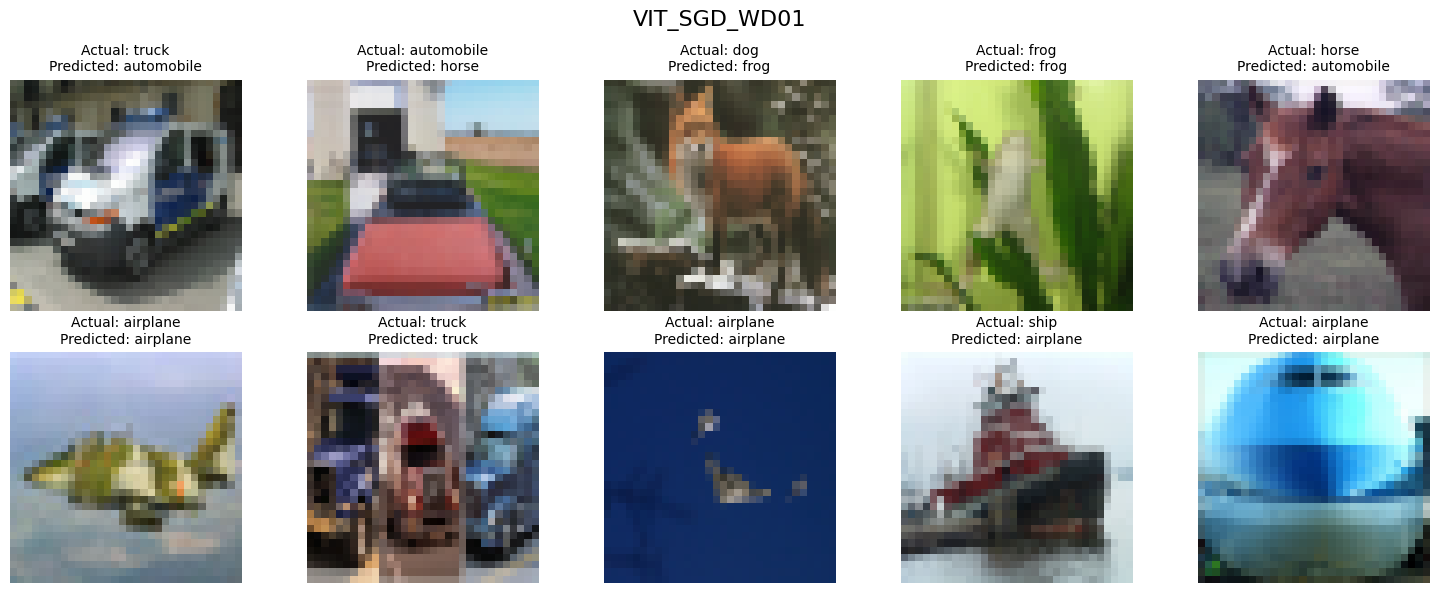

In [77]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Learning rate


### VIT SGD lr = 0.01


In [78]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [79]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [80]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.8597 Acc: 0.3035
valid Loss: 1.6487 Acc: 0.3888

Epoch 1/19
----------
train Loss: 1.5986 Acc: 0.4043
valid Loss: 1.5069 Acc: 0.4406

Epoch 2/19
----------
train Loss: 1.4634 Acc: 0.4575
valid Loss: 1.4203 Acc: 0.4737

Epoch 3/19
----------
train Loss: 1.3708 Acc: 0.4924
valid Loss: 1.3290 Acc: 0.5092

Epoch 4/19
----------
train Loss: 1.2984 Acc: 0.5203
valid Loss: 1.2662 Acc: 0.5339

Epoch 5/19
----------
train Loss: 1.2418 Acc: 0.5433
valid Loss: 1.2399 Acc: 0.5469

Epoch 6/19
----------
train Loss: 1.1913 Acc: 0.5628
valid Loss: 1.2061 Acc: 0.5606

Epoch 7/19
----------
train Loss: 1.0420 Acc: 0.6203
valid Loss: 1.0842 Acc: 0.6059

Epoch 8/19
----------
train Loss: 1.0097 Acc: 0.6330
valid Loss: 1.0753 Acc: 0.6096

Epoch 9/19
----------
train Loss: 0.9925 Acc: 0.6394
valid Loss: 1.0718 Acc: 0.6115

Epoch 10/19
----------
train Loss: 0.9768 Acc: 0.6443
valid Loss: 1.0568 Acc: 0.6158

Epoch 11/19
----------
train Loss: 0.9627 Acc: 0.6491
valid Loss

In [81]:
title = 'VIT_SGD_LR001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

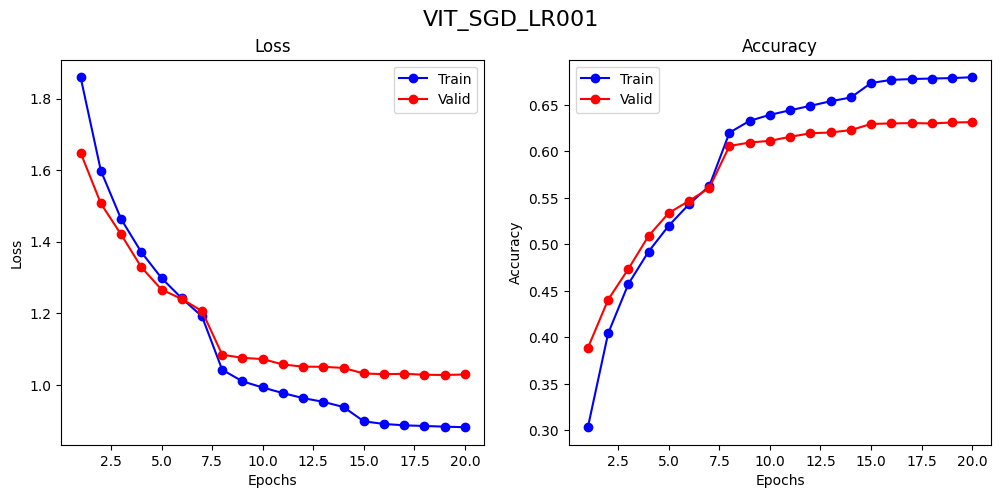

In [82]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [83]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.6306

Classification Report:
              precision    recall  f1-score   support

    airplane       0.73      0.70      0.71      9000
  automobile       0.67      0.69      0.68      9000
        bird       0.58      0.61      0.59      9000
         cat       0.49      0.50      0.50      9000
        deer       0.55      0.53      0.54      9000
         dog       0.49      0.42      0.45      9000
        frog       0.73      0.77      0.75      9000
       horse       0.69      0.70      0.69      9000
        ship       0.69      0.75      0.72      9000
       truck       0.68      0.63      0.65      9000

    accuracy                           0.63     90000
   macro avg       0.63      0.63      0.63     90000
weighted avg       0.63      0.63      0.63     90000



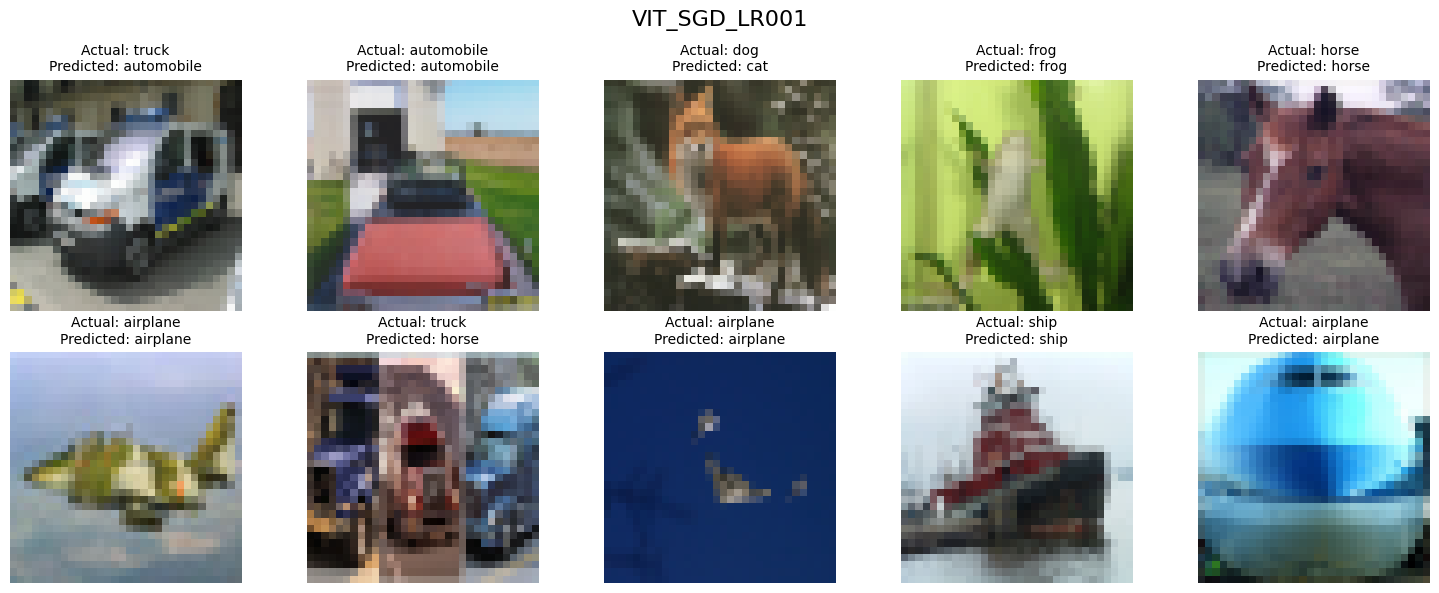

In [84]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VIT SGD lr = 0.1


In [85]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [86]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [87]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.0414 Acc: 0.2334
valid Loss: 1.9184 Acc: 0.2621

Epoch 1/19
----------
train Loss: 1.8975 Acc: 0.2760
valid Loss: 1.8644 Acc: 0.2888

Epoch 2/19
----------
train Loss: 1.8414 Acc: 0.3029
valid Loss: 1.8615 Acc: 0.2891

Epoch 3/19
----------
train Loss: 1.7769 Acc: 0.3355
valid Loss: 1.7480 Acc: 0.3493

Epoch 4/19
----------
train Loss: 1.7226 Acc: 0.3606
valid Loss: 1.6884 Acc: 0.3698

Epoch 5/19
----------
train Loss: 1.6650 Acc: 0.3844
valid Loss: 1.7032 Acc: 0.3679

Epoch 6/19
----------
train Loss: 1.6087 Acc: 0.4043
valid Loss: 1.6085 Acc: 0.4063

Epoch 7/19
----------
train Loss: 1.4193 Acc: 0.4772
valid Loss: 1.4134 Acc: 0.4783

Epoch 8/19
----------
train Loss: 1.3794 Acc: 0.4921
valid Loss: 1.3879 Acc: 0.4882

Epoch 9/19
----------
train Loss: 1.3514 Acc: 0.5035
valid Loss: 1.3851 Acc: 0.4903

Epoch 10/19
----------
train Loss: 1.3286 Acc: 0.5115
valid Loss: 1.3526 Acc: 0.5026

Epoch 11/19
----------
train Loss: 1.3080 Acc: 0.5198
valid Loss

In [88]:
title = 'VIT_SGD_LR01'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

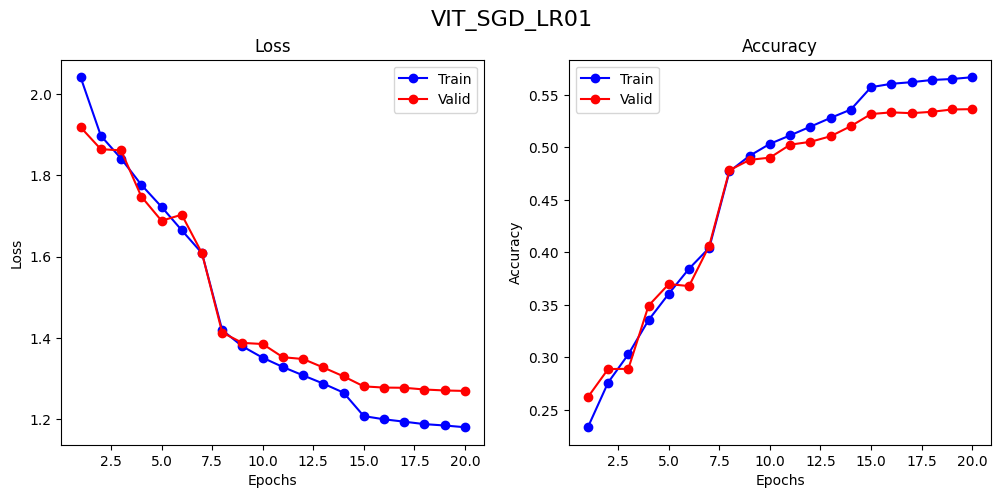

In [89]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [90]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.5395

Classification Report:
              precision    recall  f1-score   support

    airplane       0.66      0.64      0.65      9000
  automobile       0.55      0.61      0.58      9000
        bird       0.48      0.48      0.48      9000
         cat       0.41      0.37      0.39      9000
        deer       0.46      0.42      0.44      9000
         dog       0.41      0.35      0.37      9000
        frog       0.63      0.69      0.66      9000
       horse       0.59      0.63      0.61      9000
        ship       0.60      0.67      0.63      9000
       truck       0.55      0.53      0.54      9000

    accuracy                           0.54     90000
   macro avg       0.53      0.54      0.54     90000
weighted avg       0.53      0.54      0.54     90000



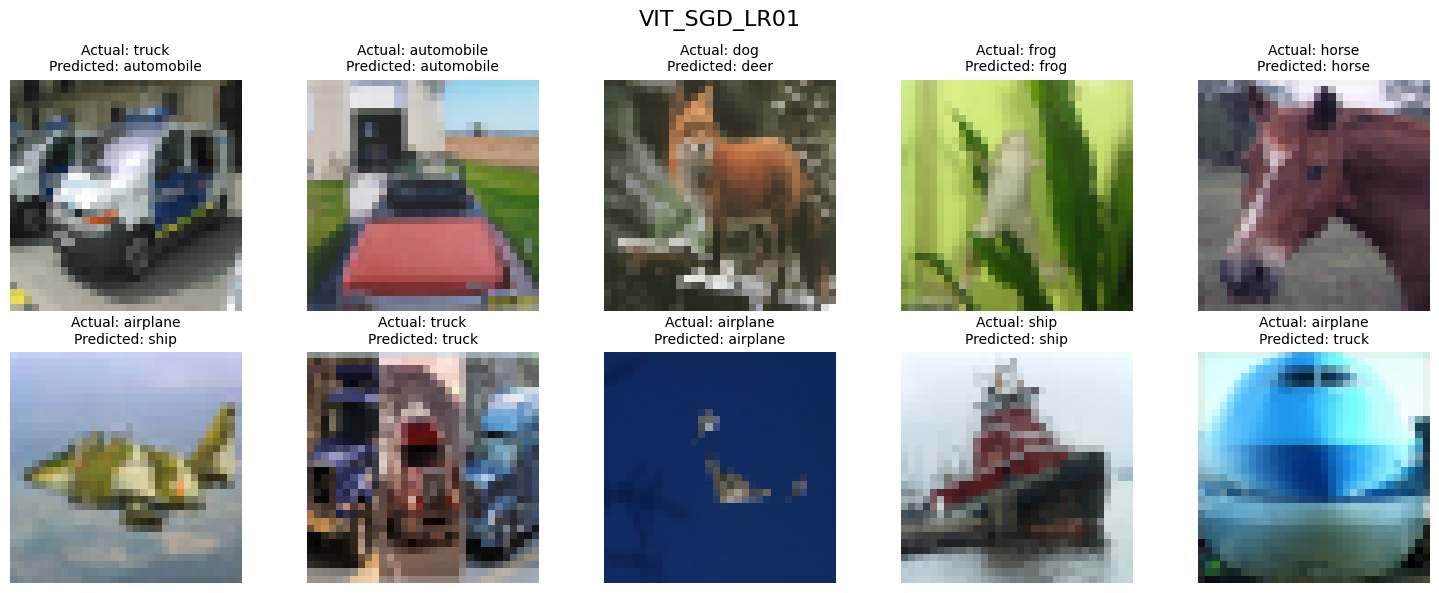

In [91]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Momentum


### VIT SGD momentum = 0


In [92]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [93]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [94]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.9550 Acc: 0.2751
valid Loss: 1.9018 Acc: 0.2945

Epoch 1/19
----------
train Loss: 1.8071 Acc: 0.3325
valid Loss: 1.7533 Acc: 0.3578

Epoch 2/19
----------
train Loss: 1.7330 Acc: 0.3637
valid Loss: 1.7186 Acc: 0.3695

Epoch 3/19
----------
train Loss: 1.6732 Acc: 0.3866
valid Loss: 1.6643 Acc: 0.3859

Epoch 4/19
----------
train Loss: 1.6226 Acc: 0.4055
valid Loss: 1.6142 Acc: 0.4093

Epoch 5/19
----------
train Loss: 1.5787 Acc: 0.4218
valid Loss: 1.5905 Acc: 0.4154

Epoch 6/19
----------
train Loss: 1.5456 Acc: 0.4325
valid Loss: 1.5515 Acc: 0.4273

Epoch 7/19
----------
train Loss: 1.4797 Acc: 0.4599
valid Loss: 1.4949 Acc: 0.4520

Epoch 8/19
----------
train Loss: 1.4681 Acc: 0.4625
valid Loss: 1.4885 Acc: 0.4537

Epoch 9/19
----------
train Loss: 1.4603 Acc: 0.4660
valid Loss: 1.4868 Acc: 0.4556

Epoch 10/19
----------
train Loss: 1.4549 Acc: 0.4668
valid Loss: 1.4783 Acc: 0.4571

Epoch 11/19
----------
train Loss: 1.4487 Acc: 0.4691
valid Loss

In [95]:
title = 'VIT_SGD_M0'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

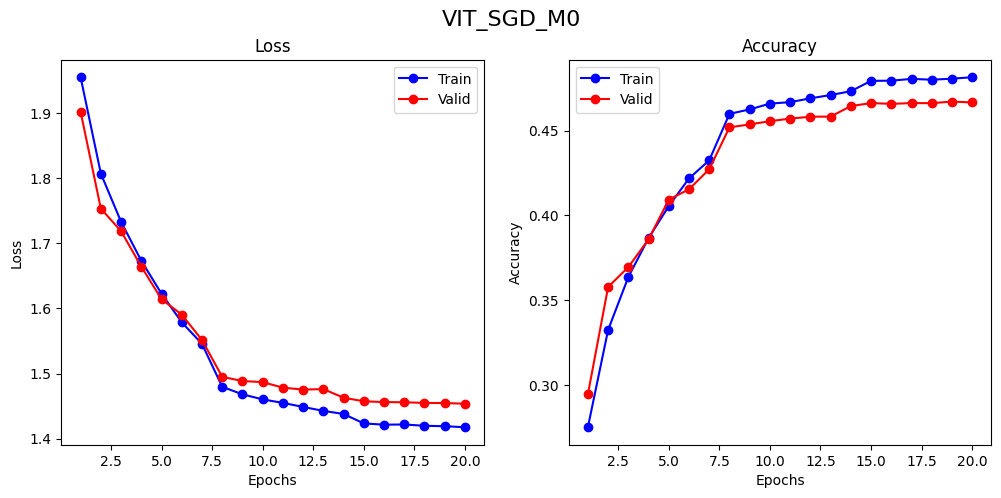

In [96]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [97]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.4662

Classification Report:
              precision    recall  f1-score   support

    airplane       0.60      0.56      0.58      9000
  automobile       0.46      0.53      0.49      9000
        bird       0.42      0.39      0.40      9000
         cat       0.33      0.32      0.32      9000
        deer       0.41      0.38      0.40      9000
         dog       0.36      0.29      0.32      9000
        frog       0.54      0.63      0.58      9000
       horse       0.50      0.54      0.52      9000
        ship       0.55      0.57      0.56      9000
       truck       0.45      0.46      0.46      9000

    accuracy                           0.47     90000
   macro avg       0.46      0.47      0.46     90000
weighted avg       0.46      0.47      0.46     90000



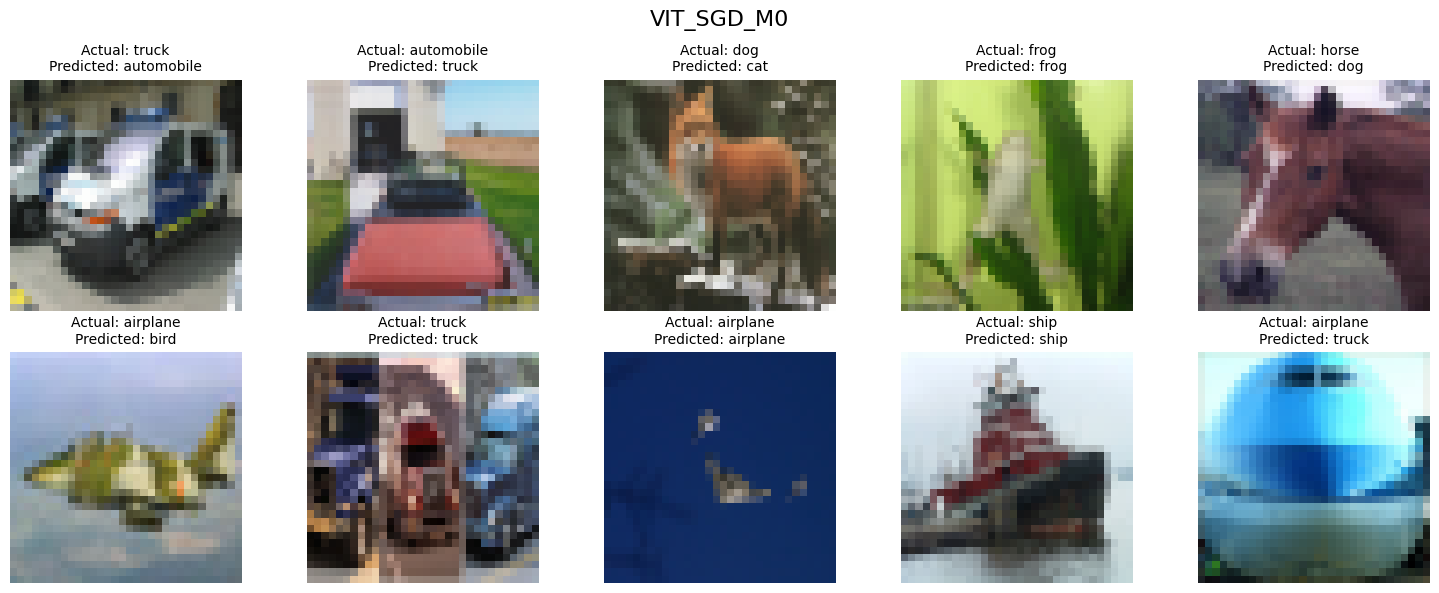

In [98]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VIT SGD momentum = 0.5


In [99]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [100]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [101]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.9193 Acc: 0.2871
valid Loss: 1.8370 Acc: 0.3109

Epoch 1/19
----------
train Loss: 1.7571 Acc: 0.3531
valid Loss: 1.6939 Acc: 0.3779

Epoch 2/19
----------
train Loss: 1.6634 Acc: 0.3884
valid Loss: 1.6450 Acc: 0.3948

Epoch 3/19
----------
train Loss: 1.5945 Acc: 0.4137
valid Loss: 1.5920 Acc: 0.4112

Epoch 4/19
----------
train Loss: 1.5493 Acc: 0.4307
valid Loss: 1.5348 Acc: 0.4356

Epoch 5/19
----------
train Loss: 1.5099 Acc: 0.4430
valid Loss: 1.5296 Acc: 0.4368

Epoch 6/19
----------
train Loss: 1.4763 Acc: 0.4561
valid Loss: 1.4755 Acc: 0.4533

Epoch 7/19
----------
train Loss: 1.3929 Acc: 0.4878
valid Loss: 1.4122 Acc: 0.4805

Epoch 8/19
----------
train Loss: 1.3752 Acc: 0.4943
valid Loss: 1.4030 Acc: 0.4836

Epoch 9/19
----------
train Loss: 1.3640 Acc: 0.4993
valid Loss: 1.4008 Acc: 0.4841

Epoch 10/19
----------
train Loss: 1.3561 Acc: 0.5018
valid Loss: 1.3880 Acc: 0.4880

Epoch 11/19
----------
train Loss: 1.3463 Acc: 0.5055
valid Loss

In [102]:
title = 'VIT_SGD_M05'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

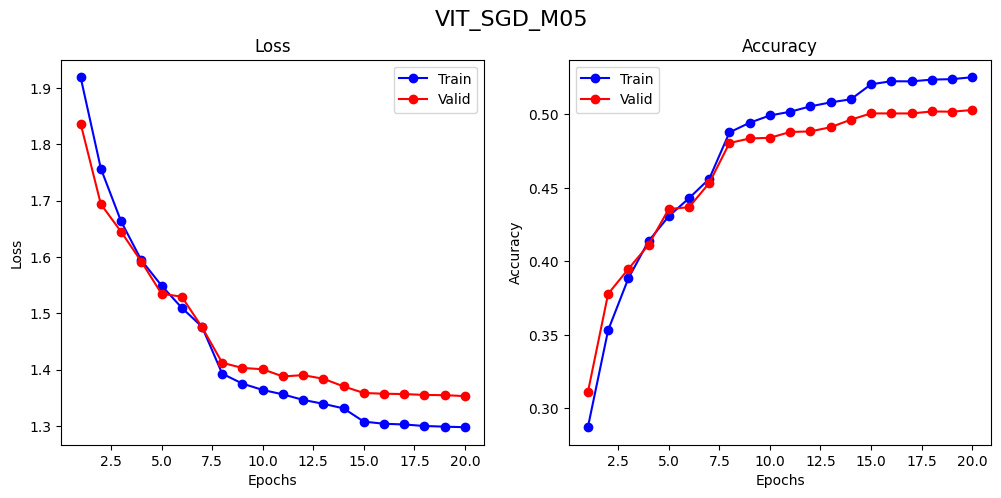

In [103]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [104]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.5032

Classification Report:
              precision    recall  f1-score   support

    airplane       0.62      0.61      0.61      9000
  automobile       0.51      0.56      0.53      9000
        bird       0.45      0.42      0.43      9000
         cat       0.37      0.33      0.35      9000
        deer       0.45      0.43      0.44      9000
         dog       0.39      0.32      0.35      9000
        frog       0.59      0.67      0.63      9000
       horse       0.53      0.59      0.56      9000
        ship       0.57      0.61      0.59      9000
       truck       0.51      0.49      0.50      9000

    accuracy                           0.50     90000
   macro avg       0.50      0.50      0.50     90000
weighted avg       0.50      0.50      0.50     90000



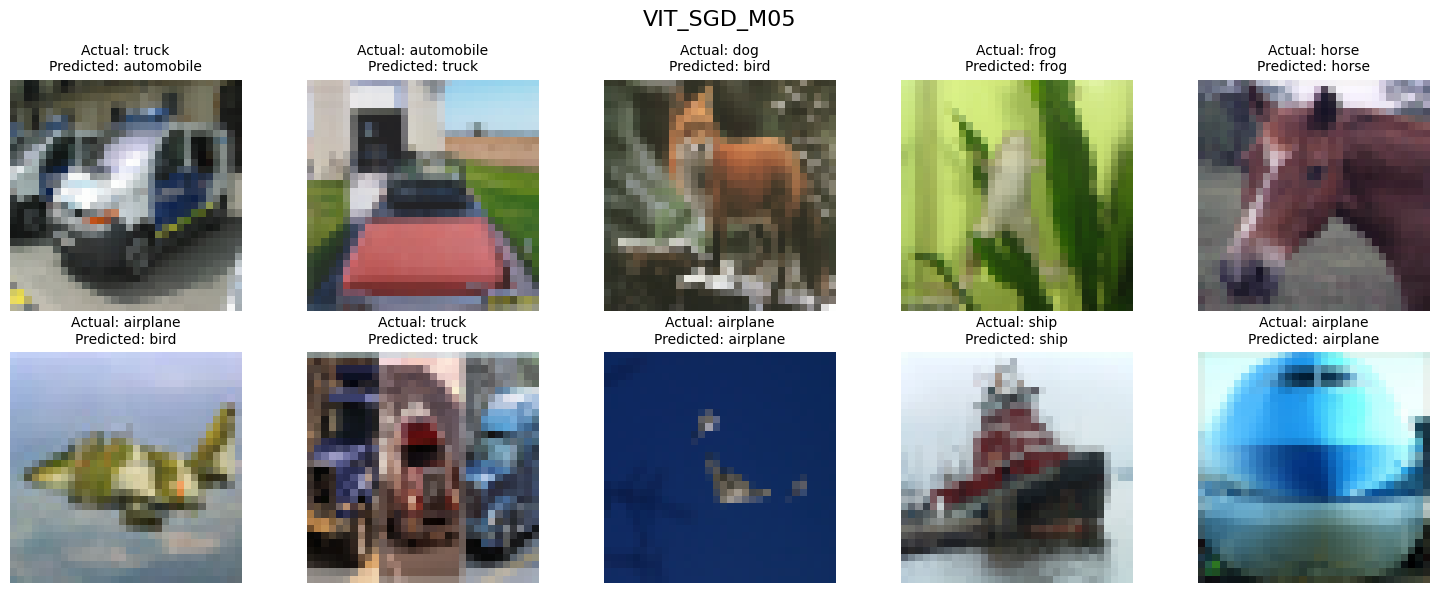

In [105]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VIT SGD 10 epochs


In [106]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [107]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [108]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=10
)

Epoch 0/9
----------
train Loss: 1.8694 Acc: 0.3023
valid Loss: 1.7761 Acc: 0.3438

Epoch 1/9
----------
train Loss: 1.6635 Acc: 0.3848
valid Loss: 1.5886 Acc: 0.4139

Epoch 2/9
----------
train Loss: 1.5644 Acc: 0.4224
valid Loss: 1.5519 Acc: 0.4261

Epoch 3/9
----------
train Loss: 1.4918 Acc: 0.4469
valid Loss: 1.4730 Acc: 0.4554

Epoch 4/9
----------
train Loss: 1.4359 Acc: 0.4688
valid Loss: 1.4218 Acc: 0.4740

Epoch 5/9
----------
train Loss: 1.3927 Acc: 0.4839
valid Loss: 1.3928 Acc: 0.4877

Epoch 6/9
----------
train Loss: 1.3565 Acc: 0.4986
valid Loss: 1.3656 Acc: 0.4957

Epoch 7/9
----------
train Loss: 1.2439 Acc: 0.5402
valid Loss: 1.2707 Acc: 0.5323

Epoch 8/9
----------
train Loss: 1.2234 Acc: 0.5478
valid Loss: 1.2551 Acc: 0.5381

Epoch 9/9
----------
train Loss: 1.2097 Acc: 0.5550
valid Loss: 1.2566 Acc: 0.5394

Training complete in 23m 46s
Best val Acc: 0.539433


In [109]:
title = 'VIT_SGD_EPOCHS10'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

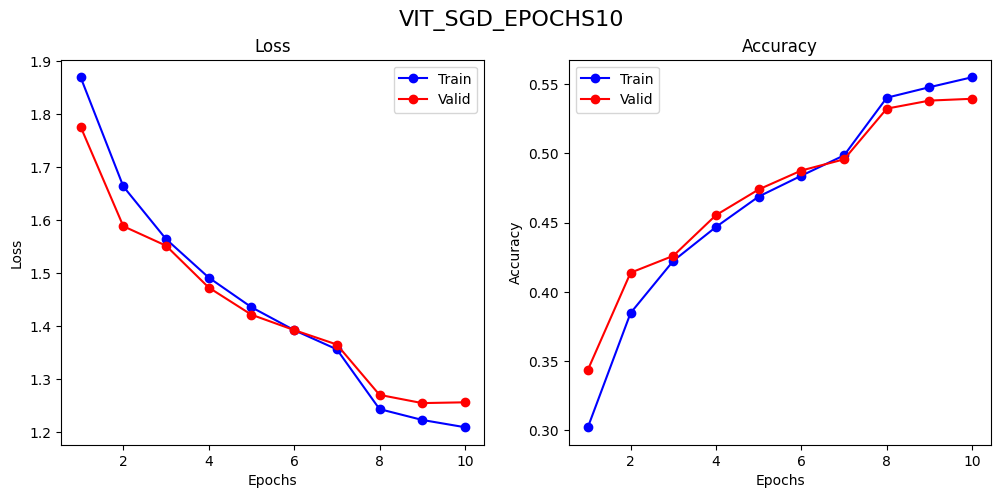

In [110]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [111]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.5371

Classification Report:
              precision    recall  f1-score   support

    airplane       0.66      0.61      0.64      9000
  automobile       0.62      0.49      0.55      9000
        bird       0.53      0.41      0.46      9000
         cat       0.41      0.36      0.38      9000
        deer       0.45      0.50      0.47      9000
         dog       0.39      0.39      0.39      9000
        frog       0.62      0.73      0.67      9000
       horse       0.54      0.66      0.60      9000
        ship       0.62      0.65      0.63      9000
       truck       0.54      0.58      0.56      9000

    accuracy                           0.54     90000
   macro avg       0.54      0.54      0.53     90000
weighted avg       0.54      0.54      0.53     90000



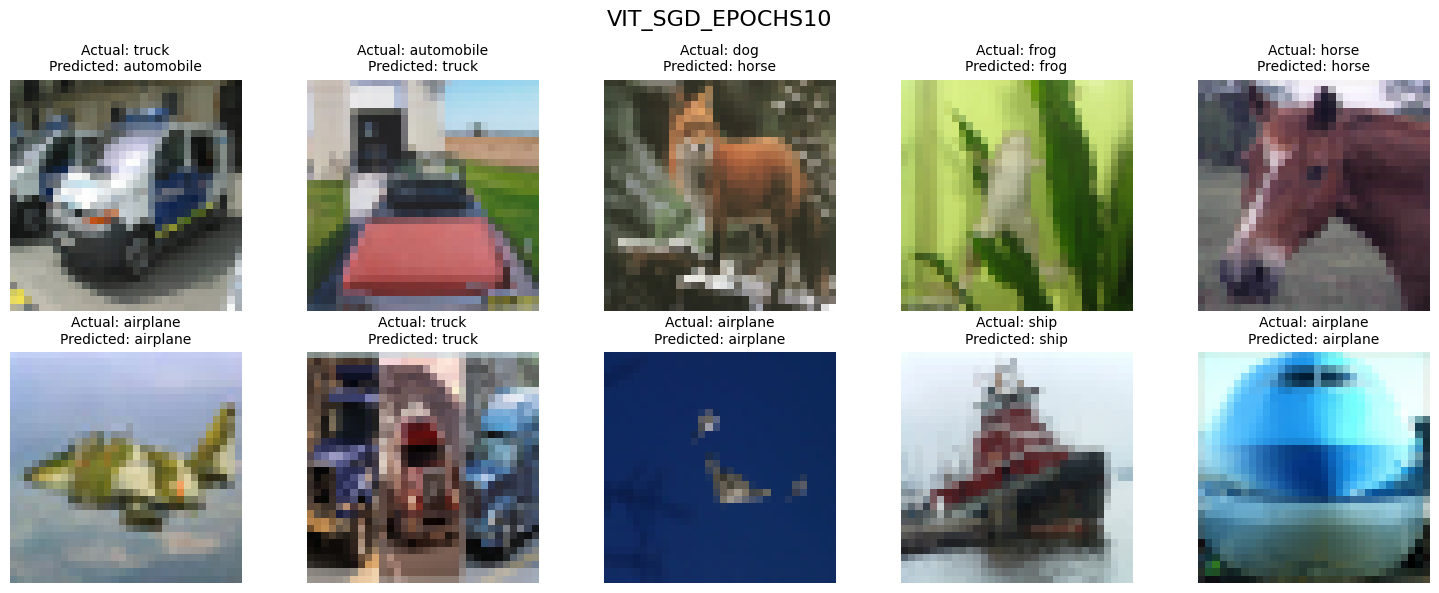

In [112]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VIT SGD 40 epochs


In [113]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [114]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [115]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=40
)

Epoch 0/39
----------
train Loss: 1.8694 Acc: 0.3023
valid Loss: 1.7761 Acc: 0.3438

Epoch 1/39
----------
train Loss: 1.6635 Acc: 0.3848
valid Loss: 1.5886 Acc: 0.4139

Epoch 2/39
----------
train Loss: 1.5644 Acc: 0.4224
valid Loss: 1.5519 Acc: 0.4261

Epoch 3/39
----------
train Loss: 1.4918 Acc: 0.4469
valid Loss: 1.4730 Acc: 0.4554

Epoch 4/39
----------
train Loss: 1.4359 Acc: 0.4688
valid Loss: 1.4218 Acc: 0.4740

Epoch 5/39
----------
train Loss: 1.3927 Acc: 0.4839
valid Loss: 1.3928 Acc: 0.4877

Epoch 6/39
----------
train Loss: 1.3565 Acc: 0.4986
valid Loss: 1.3656 Acc: 0.4957

Epoch 7/39
----------
train Loss: 1.2439 Acc: 0.5402
valid Loss: 1.2707 Acc: 0.5323

Epoch 8/39
----------
train Loss: 1.2234 Acc: 0.5478
valid Loss: 1.2551 Acc: 0.5381

Epoch 9/39
----------
train Loss: 1.2097 Acc: 0.5550
valid Loss: 1.2566 Acc: 0.5394

Epoch 10/39
----------
train Loss: 1.1978 Acc: 0.5587
valid Loss: 1.2400 Acc: 0.5440

Epoch 11/39
----------
train Loss: 1.1869 Acc: 0.5628
valid Loss

In [116]:
title = 'VIT_SGD_EPOCHS40'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

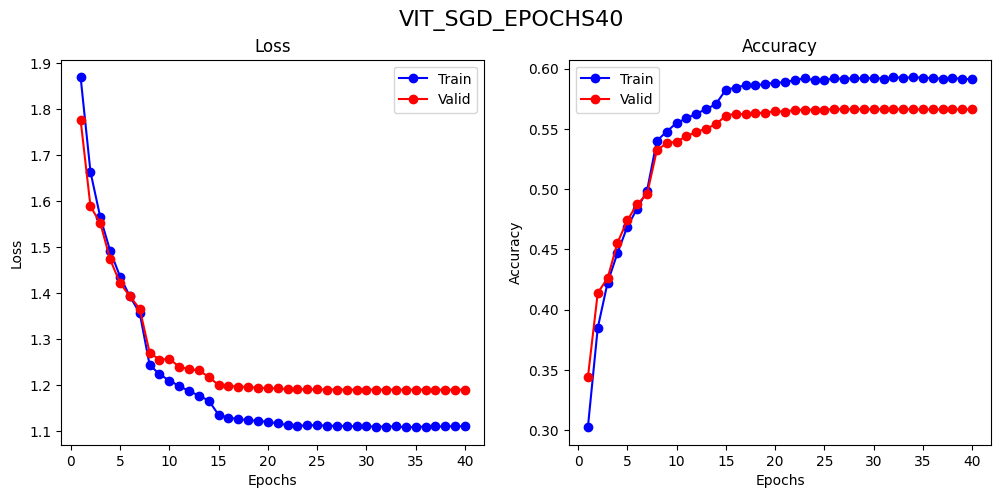

In [117]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [118]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.5623

Classification Report:
              precision    recall  f1-score   support

    airplane       0.66      0.65      0.66      9000
  automobile       0.60      0.60      0.60      9000
        bird       0.53      0.49      0.51      9000
         cat       0.42      0.42      0.42      9000
        deer       0.49      0.49      0.49      9000
         dog       0.43      0.36      0.39      9000
        frog       0.65      0.73      0.69      9000
       horse       0.61      0.65      0.63      9000
        ship       0.63      0.67      0.65      9000
       truck       0.57      0.58      0.57      9000

    accuracy                           0.56     90000
   macro avg       0.56      0.56      0.56     90000
weighted avg       0.56      0.56      0.56     90000



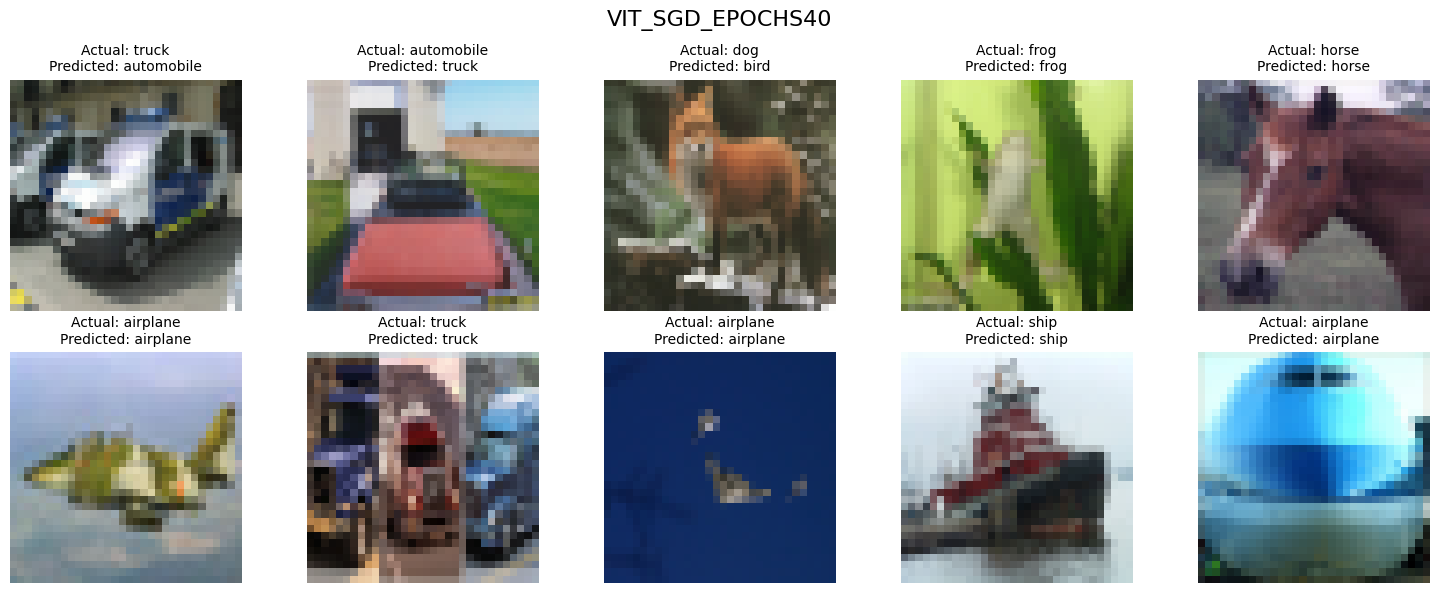

In [119]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Augmentation


In [120]:
from torchvision import transforms

In [121]:
cinic_mean = [0.47889522, 0.47227842, 0.43047404]
cinic_std = [0.24205776, 0.23828046, 0.25874835]

### VIT SGD Augmentation = None


In [122]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [123]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = transform, test_transform=transform, valid_transform=transform)

In [124]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [125]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.9873 Acc: 0.2507
valid Loss: 1.9548 Acc: 0.2490

Epoch 1/19
----------
train Loss: 1.9341 Acc: 0.2644
valid Loss: 1.8862 Acc: 0.2861

Epoch 2/19
----------
train Loss: 1.9112 Acc: 0.2735
valid Loss: 1.9433 Acc: 0.2691

Epoch 3/19
----------
train Loss: 1.9057 Acc: 0.2744
valid Loss: 1.9762 Acc: 0.2599

Epoch 4/19
----------
train Loss: 1.9046 Acc: 0.2759
valid Loss: 1.8979 Acc: 0.2851

Epoch 5/19
----------
train Loss: 1.9011 Acc: 0.2763
valid Loss: 1.9205 Acc: 0.2659

Epoch 6/19
----------
train Loss: 1.9017 Acc: 0.2761
valid Loss: 1.9331 Acc: 0.2906

Epoch 7/19
----------
train Loss: 1.8040 Acc: 0.3189
valid Loss: 1.7822 Acc: 0.3285

Epoch 8/19
----------
train Loss: 1.7913 Acc: 0.3230
valid Loss: 1.7902 Acc: 0.3247

Epoch 9/19
----------
train Loss: 1.7835 Acc: 0.3271
valid Loss: 1.7820 Acc: 0.3237

Epoch 10/19
----------
train Loss: 1.7782 Acc: 0.3268
valid Loss: 1.7656 Acc: 0.3296

Epoch 11/19
----------
train Loss: 1.7703 Acc: 0.3319
valid Loss

In [126]:
title = 'VIT_SGD_AUG_NONE'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

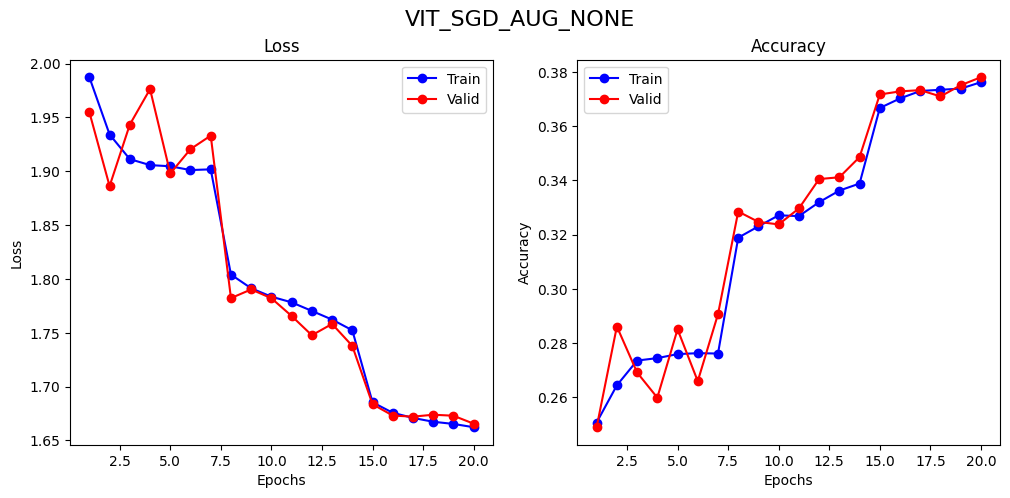

In [127]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [128]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.3758

Classification Report:
              precision    recall  f1-score   support

    airplane       0.47      0.59      0.53      9000
  automobile       0.40      0.46      0.43      9000
        bird       0.28      0.27      0.27      9000
         cat       0.28      0.21      0.24      9000
        deer       0.33      0.22      0.27      9000
         dog       0.27      0.15      0.19      9000
        frog       0.39      0.61      0.48      9000
       horse       0.42      0.43      0.43      9000
        ship       0.39      0.43      0.41      9000
       truck       0.39      0.39      0.39      9000

    accuracy                           0.38     90000
   macro avg       0.36      0.38      0.36     90000
weighted avg       0.36      0.38      0.36     90000



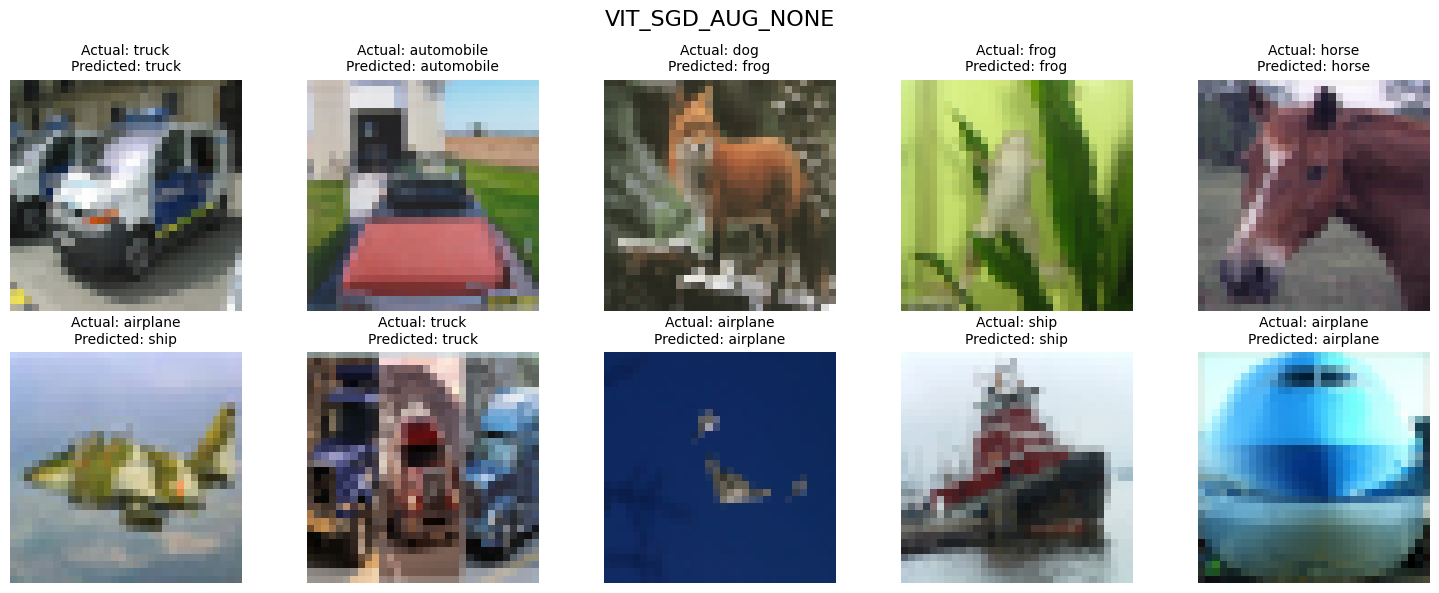

In [129]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VIT SGD Augmentation = ColorJitter


In [130]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [131]:
train_transform = transforms.Compose([
    transforms.ColorJitter(brightness=0.2, contrast=0.2), 
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [132]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [133]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.0018 Acc: 0.2458
valid Loss: 1.9783 Acc: 0.2450

Epoch 1/19
----------
train Loss: 1.9512 Acc: 0.2556
valid Loss: 1.9132 Acc: 0.2726

Epoch 2/19
----------
train Loss: 1.9373 Acc: 0.2634
valid Loss: 1.9660 Acc: 0.2508

Epoch 3/19
----------
train Loss: 1.9300 Acc: 0.2636
valid Loss: 1.9541 Acc: 0.2528

Epoch 4/19
----------
train Loss: 1.9291 Acc: 0.2661
valid Loss: 1.8958 Acc: 0.2756

Epoch 5/19
----------
train Loss: 1.9233 Acc: 0.2685
valid Loss: 1.9676 Acc: 0.2433

Epoch 6/19
----------
train Loss: 1.9285 Acc: 0.2653
valid Loss: 1.8762 Acc: 0.2855

Epoch 7/19
----------
train Loss: 1.8406 Acc: 0.3002
valid Loss: 1.8180 Acc: 0.3113

Epoch 8/19
----------
train Loss: 1.8337 Acc: 0.3035
valid Loss: 1.8644 Acc: 0.2954

Epoch 9/19
----------
train Loss: 1.8266 Acc: 0.3054
valid Loss: 1.8145 Acc: 0.3073

Epoch 10/19
----------
train Loss: 1.8199 Acc: 0.3098
valid Loss: 1.7896 Acc: 0.3187

Epoch 11/19
----------
train Loss: 1.8048 Acc: 0.3175
valid Loss

In [134]:
title = 'VIT_SGD_AUG_ColorJitter'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

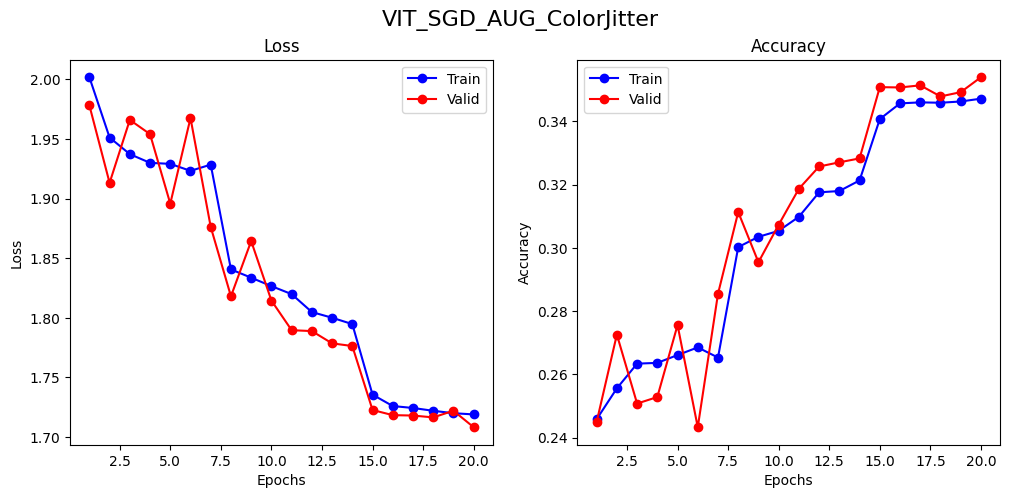

In [135]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [136]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.3520

Classification Report:
              precision    recall  f1-score   support

    airplane       0.43      0.55      0.48      9000
  automobile       0.37      0.54      0.44      9000
        bird       0.25      0.17      0.20      9000
         cat       0.29      0.24      0.26      9000
        deer       0.31      0.24      0.27      9000
         dog       0.26      0.13      0.17      9000
        frog       0.40      0.57      0.47      9000
       horse       0.38      0.50      0.43      9000
        ship       0.31      0.19      0.23      9000
       truck       0.37      0.39      0.38      9000

    accuracy                           0.35     90000
   macro avg       0.33      0.35      0.33     90000
weighted avg       0.33      0.35      0.33     90000



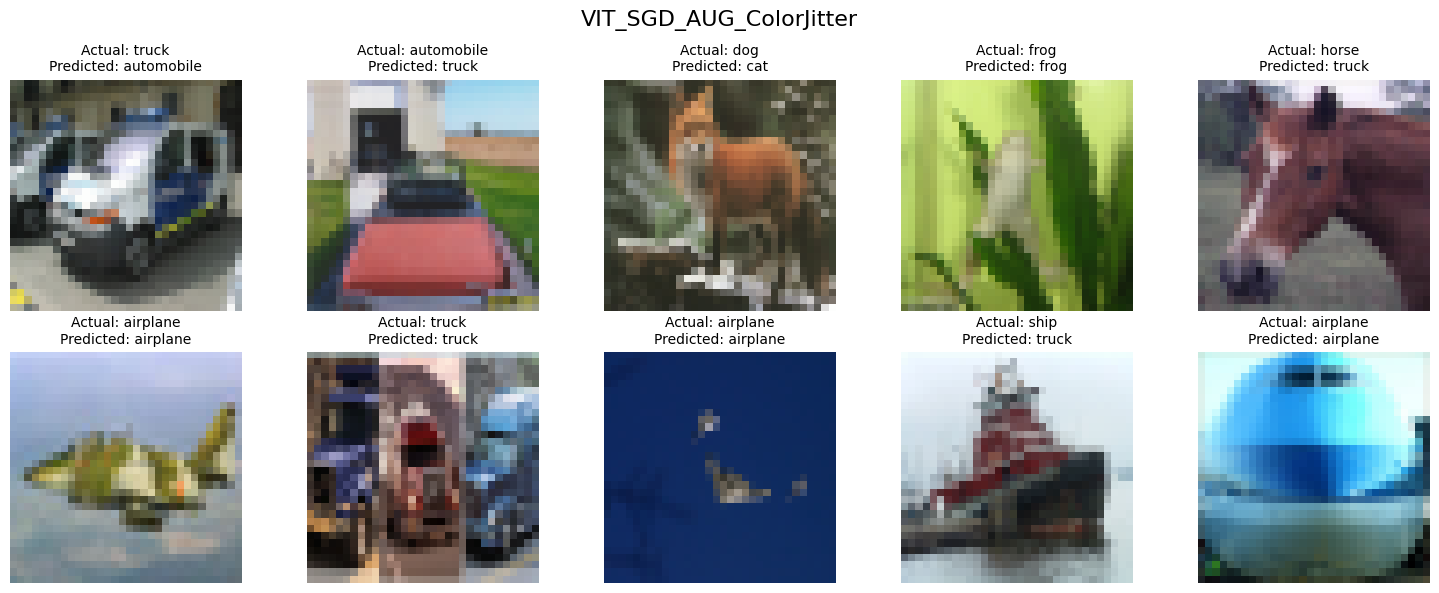

In [137]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VIT SGD Augmentation = Gray Scale + GaussianBlur


In [138]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [139]:
train_transform = transforms.Compose([
    transforms.RandomGrayscale(p=0.1),
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [140]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [141]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.0056 Acc: 0.2459
valid Loss: 1.9260 Acc: 0.2570

Epoch 1/19
----------
train Loss: 1.9702 Acc: 0.2526
valid Loss: 1.9498 Acc: 0.2659

Epoch 2/19
----------
train Loss: 1.9529 Acc: 0.2594
valid Loss: 1.9402 Acc: 0.2608

Epoch 3/19
----------
train Loss: 1.9411 Acc: 0.2640
valid Loss: 1.9625 Acc: 0.2595

Epoch 4/19
----------
train Loss: 1.9440 Acc: 0.2635
valid Loss: 1.9019 Acc: 0.2743

Epoch 5/19
----------
train Loss: 1.9411 Acc: 0.2636
valid Loss: 1.9662 Acc: 0.2433

Epoch 6/19
----------
train Loss: 1.9409 Acc: 0.2640
valid Loss: 1.9475 Acc: 0.2607

Epoch 7/19
----------
train Loss: 1.8519 Acc: 0.3018
valid Loss: 1.8453 Acc: 0.3086

Epoch 8/19
----------
train Loss: 1.8485 Acc: 0.3052
valid Loss: 1.8423 Acc: 0.3098

Epoch 9/19
----------
train Loss: 1.8437 Acc: 0.3061
valid Loss: 1.8314 Acc: 0.3111

Epoch 10/19
----------
train Loss: 1.8457 Acc: 0.3079
valid Loss: 1.8220 Acc: 0.3179

Epoch 11/19
----------
train Loss: 1.8429 Acc: 0.3074
valid Loss

In [142]:
title = 'VIT_SGD_AUG_Grayscale_Blur'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

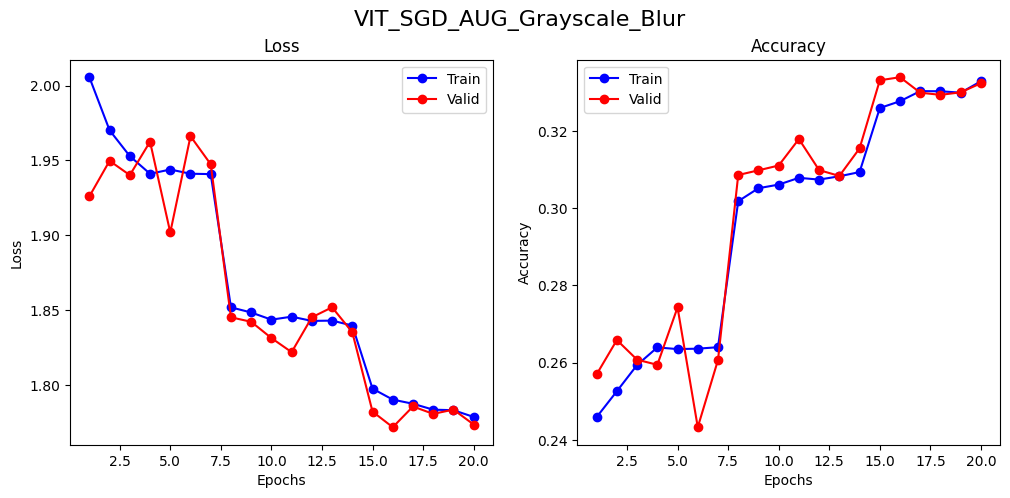

In [143]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [144]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.3334

Classification Report:
              precision    recall  f1-score   support

    airplane       0.45      0.48      0.46      9000
  automobile       0.35      0.51      0.42      9000
        bird       0.28      0.18      0.22      9000
         cat       0.24      0.35      0.29      9000
        deer       0.33      0.14      0.19      9000
         dog       0.23      0.11      0.15      9000
        frog       0.30      0.51      0.38      9000
       horse       0.40      0.34      0.37      9000
        ship       0.36      0.33      0.34      9000
       truck       0.38      0.37      0.38      9000

    accuracy                           0.33     90000
   macro avg       0.33      0.33      0.32     90000
weighted avg       0.33      0.33      0.32     90000



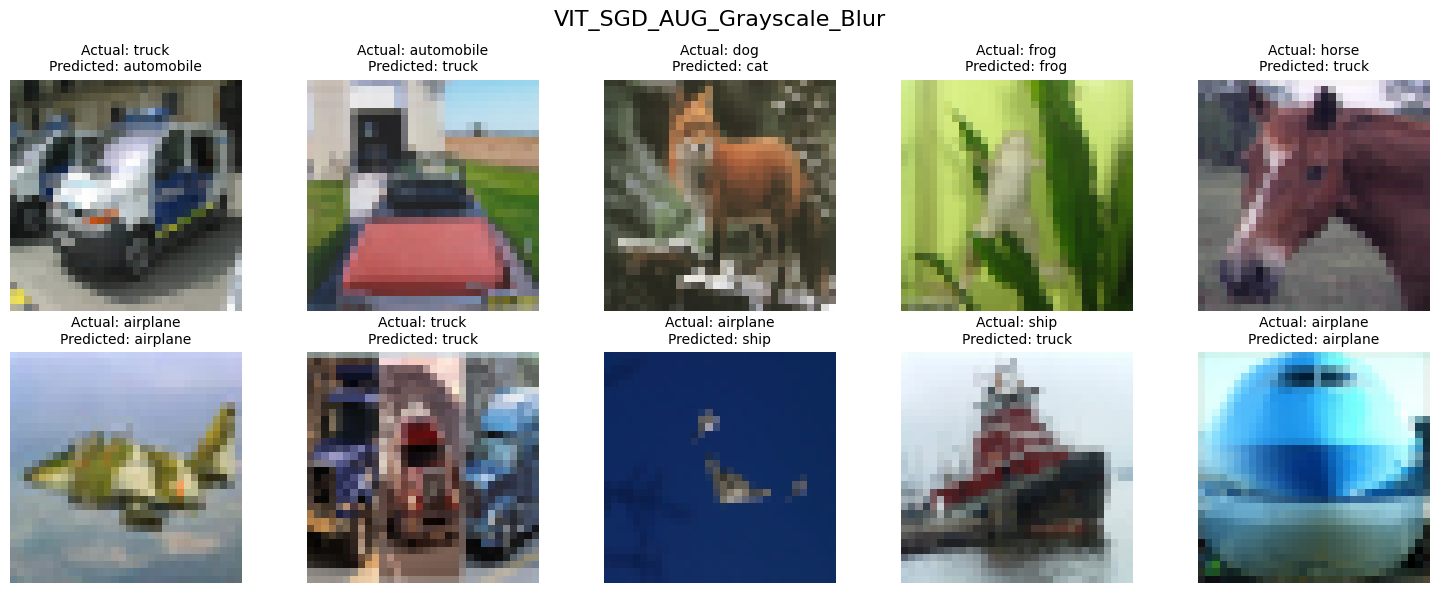

In [145]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VIT SGD Augmentation = RandomHorizontalFlip + RandomCrop


In [146]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [147]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4), 
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [148]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [149]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.0275 Acc: 0.2400
valid Loss: 2.0218 Acc: 0.2304

Epoch 1/19
----------
train Loss: 1.9918 Acc: 0.2464
valid Loss: 1.9326 Acc: 0.2687

Epoch 2/19
----------
train Loss: 1.9652 Acc: 0.2561
valid Loss: 1.9971 Acc: 0.2460

Epoch 3/19
----------
train Loss: 1.9565 Acc: 0.2592
valid Loss: 1.9386 Acc: 0.2691

Epoch 4/19
----------
train Loss: 1.9529 Acc: 0.2601
valid Loss: 1.9227 Acc: 0.2666

Epoch 5/19
----------
train Loss: 1.9471 Acc: 0.2617
valid Loss: 2.0647 Acc: 0.2238

Epoch 6/19
----------
train Loss: 1.9529 Acc: 0.2602
valid Loss: 1.9801 Acc: 0.2584

Epoch 7/19
----------
train Loss: 1.8655 Acc: 0.2941
valid Loss: 1.8789 Acc: 0.2884

Epoch 8/19
----------
train Loss: 1.8618 Acc: 0.2927
valid Loss: 1.9045 Acc: 0.2773

Epoch 9/19
----------
train Loss: 1.8586 Acc: 0.2956
valid Loss: 1.9131 Acc: 0.2798

Epoch 10/19
----------
train Loss: 1.8551 Acc: 0.2976
valid Loss: 1.8906 Acc: 0.2805

Epoch 11/19
----------
train Loss: 1.8488 Acc: 0.3010
valid Loss

In [150]:
title = 'VIT_SGD_AUG_HorizontalFlip_Crop'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

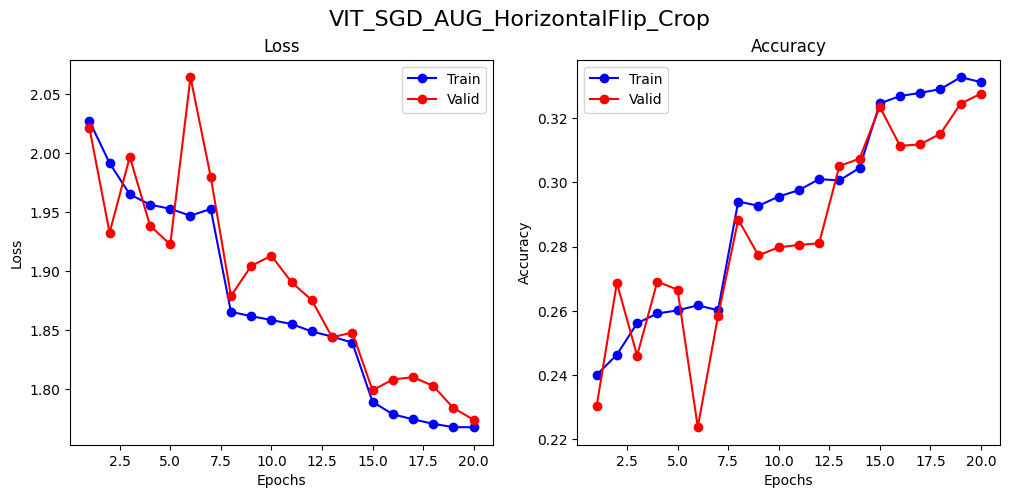

In [151]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [152]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.3259

Classification Report:
              precision    recall  f1-score   support

    airplane       0.37      0.71      0.48      9000
  automobile       0.40      0.32      0.35      9000
        bird       0.23      0.36      0.28      9000
         cat       0.27      0.16      0.20      9000
        deer       0.27      0.24      0.25      9000
         dog       0.30      0.14      0.19      9000
        frog       0.37      0.57      0.45      9000
       horse       0.39      0.36      0.38      9000
        ship       0.24      0.17      0.20      9000
       truck       0.39      0.23      0.29      9000

    accuracy                           0.33     90000
   macro avg       0.32      0.33      0.31     90000
weighted avg       0.32      0.33      0.31     90000



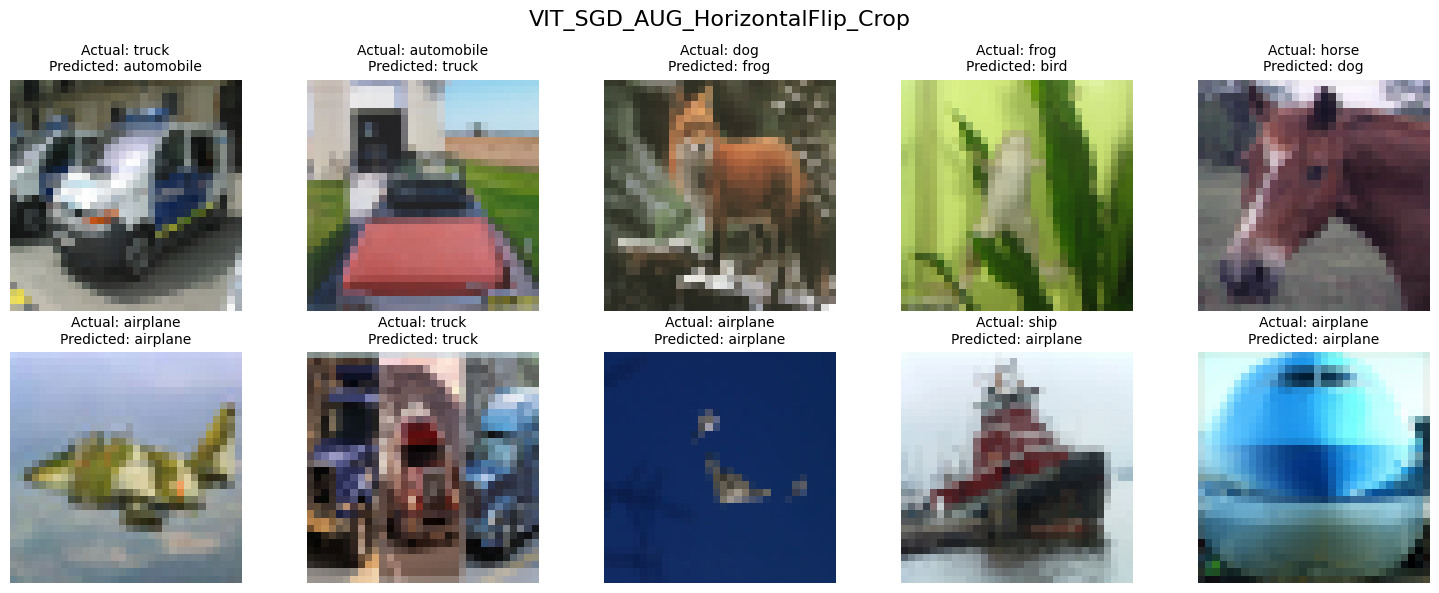

In [153]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### Advanced - VIT SGD Augmentation = Auto Augment


In [154]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [155]:
from torchvision.transforms import autoaugment

train_transform = transforms.Compose([
    autoaugment.AutoAugment(
        policy=autoaugment.AutoAugmentPolicy.CIFAR10,
        interpolation=transforms.InterpolationMode.BILINEAR,
    ),
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [156]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [157]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 2.1564 Acc: 0.1851
valid Loss: 2.0426 Acc: 0.2117

Epoch 1/19
----------
train Loss: 2.1286 Acc: 0.1923
valid Loss: 2.0445 Acc: 0.2201

Epoch 2/19
----------
train Loss: 2.1127 Acc: 0.1955
valid Loss: 2.0252 Acc: 0.2294

Epoch 3/19
----------
train Loss: 2.0957 Acc: 0.2025
valid Loss: 1.9732 Acc: 0.2354

Epoch 4/19
----------
train Loss: 2.0902 Acc: 0.2047
valid Loss: 1.9792 Acc: 0.2413

Epoch 5/19
----------
train Loss: 2.0816 Acc: 0.2085
valid Loss: 2.0282 Acc: 0.2192

Epoch 6/19
----------
train Loss: 2.0842 Acc: 0.2065
valid Loss: 1.9790 Acc: 0.2408

Epoch 7/19
----------
train Loss: 2.0161 Acc: 0.2296
valid Loss: 1.9138 Acc: 0.2643

Epoch 8/19
----------
train Loss: 2.0130 Acc: 0.2307
valid Loss: 1.8980 Acc: 0.2668

Epoch 9/19
----------
train Loss: 2.0100 Acc: 0.2305
valid Loss: 1.9414 Acc: 0.2551

Epoch 10/19
----------
train Loss: 2.0096 Acc: 0.2313
valid Loss: 1.8989 Acc: 0.2666

Epoch 11/19
----------
train Loss: 2.0057 Acc: 0.2320
valid Loss

In [158]:
title = 'VIT_SGD_AUG_AUTO'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

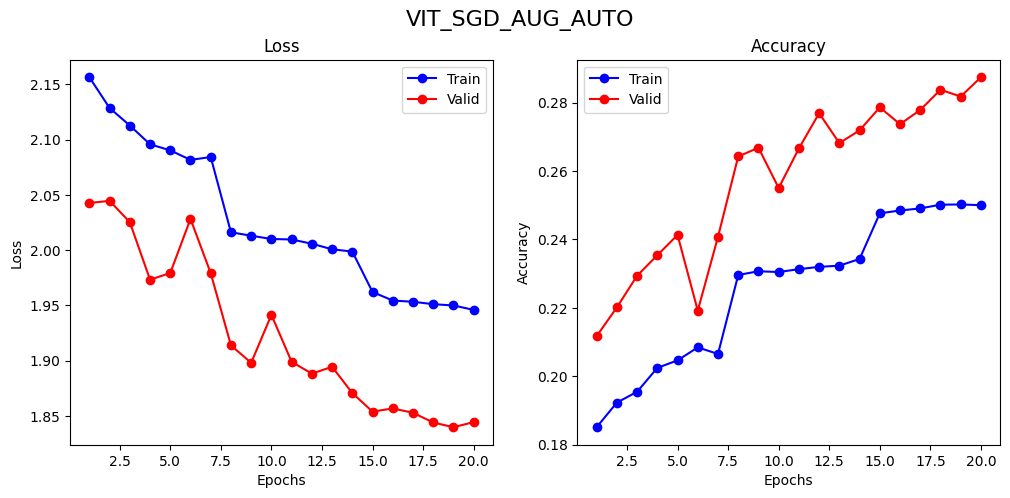

In [159]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [160]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.2856

Classification Report:
              precision    recall  f1-score   support

    airplane       0.39      0.61      0.47      9000
  automobile       0.34      0.36      0.35      9000
        bird       0.21      0.18      0.19      9000
         cat       0.23      0.20      0.21      9000
        deer       0.25      0.11      0.15      9000
         dog       0.22      0.11      0.14      9000
        frog       0.29      0.54      0.38      9000
       horse       0.20      0.21      0.20      9000
        ship       0.25      0.18      0.21      9000
       truck       0.33      0.36      0.35      9000

    accuracy                           0.29     90000
   macro avg       0.27      0.29      0.27     90000
weighted avg       0.27      0.29      0.27     90000



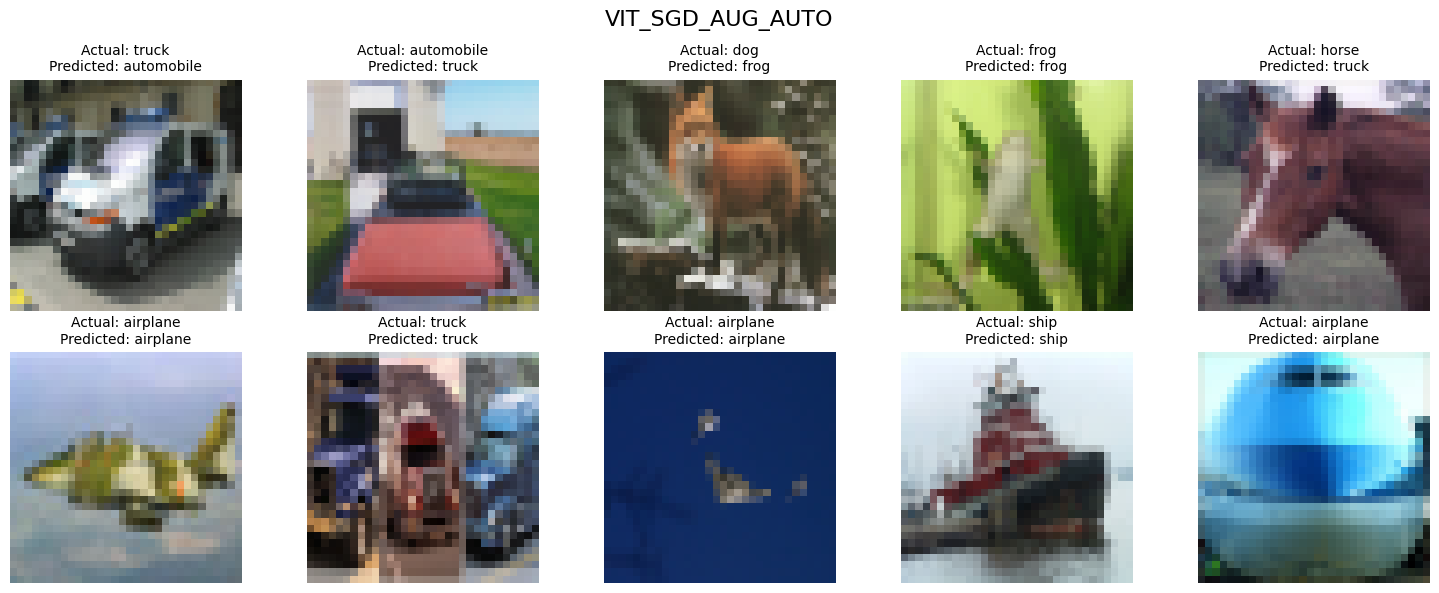

In [161]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### Advanced - VIT SGD Augmentation = Auto Augment 40 Epochs


In [162]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [163]:
from torchvision.transforms import autoaugment

train_transform = transforms.Compose([
    autoaugment.AutoAugment(
        policy=autoaugment.AutoAugmentPolicy.CIFAR10,
        interpolation=transforms.InterpolationMode.BILINEAR,
    ),
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [164]:
model = timm.create_model(
    "vit_tiny_patch16_224",
    pretrained=False,
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=192,
    depth=12,
    num_heads=3,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [165]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=40
)

Epoch 0/39
----------
train Loss: 2.1564 Acc: 0.1851
valid Loss: 2.0426 Acc: 0.2117

Epoch 1/39
----------
train Loss: 2.1286 Acc: 0.1923
valid Loss: 2.0445 Acc: 0.2201

Epoch 2/39
----------
train Loss: 2.1127 Acc: 0.1955
valid Loss: 2.0252 Acc: 0.2294

Epoch 3/39
----------
train Loss: 2.0957 Acc: 0.2025
valid Loss: 1.9732 Acc: 0.2354

Epoch 4/39
----------
train Loss: 2.0902 Acc: 0.2047
valid Loss: 1.9792 Acc: 0.2413

Epoch 5/39
----------
train Loss: 2.0816 Acc: 0.2085
valid Loss: 2.0282 Acc: 0.2192

Epoch 6/39
----------
train Loss: 2.0842 Acc: 0.2065
valid Loss: 1.9790 Acc: 0.2408

Epoch 7/39
----------
train Loss: 2.0161 Acc: 0.2296
valid Loss: 1.9138 Acc: 0.2643

Epoch 8/39
----------
train Loss: 2.0130 Acc: 0.2307
valid Loss: 1.8980 Acc: 0.2668

Epoch 9/39
----------
train Loss: 2.0100 Acc: 0.2305
valid Loss: 1.9414 Acc: 0.2551

Epoch 10/39
----------
train Loss: 2.0096 Acc: 0.2313
valid Loss: 1.8989 Acc: 0.2666

Epoch 11/39
----------
train Loss: 2.0057 Acc: 0.2320
valid Loss

In [166]:
title = 'VIT_SGD_AUG_AUTO_EPOCHS40'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

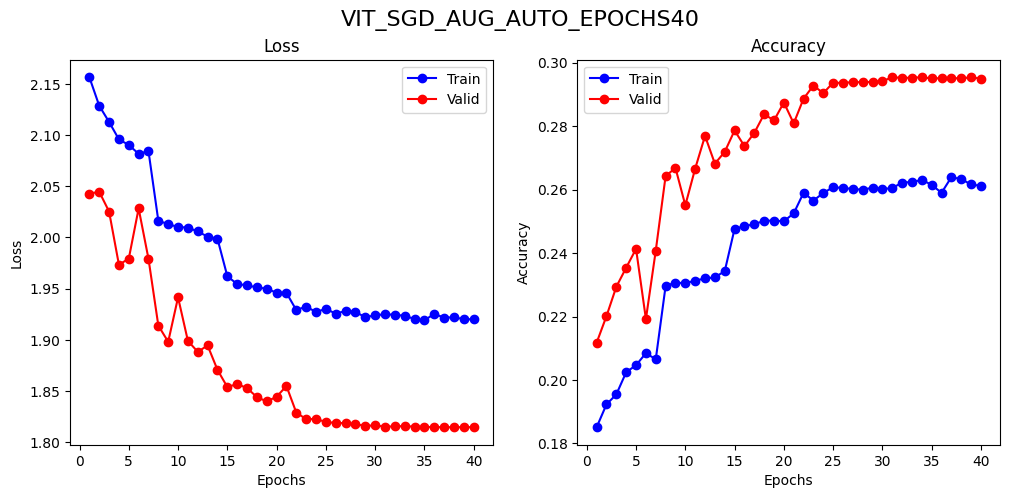

In [167]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [168]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.2932

Classification Report:
              precision    recall  f1-score   support

    airplane       0.38      0.67      0.49      9000
  automobile       0.35      0.42      0.38      9000
        bird       0.23      0.16      0.19      9000
         cat       0.21      0.21      0.21      9000
        deer       0.24      0.11      0.15      9000
         dog       0.21      0.12      0.16      9000
        frog       0.28      0.62      0.39      9000
       horse       0.22      0.17      0.19      9000
        ship       0.28      0.11      0.16      9000
       truck       0.35      0.33      0.34      9000

    accuracy                           0.29     90000
   macro avg       0.28      0.29      0.27     90000
weighted avg       0.28      0.29      0.27     90000



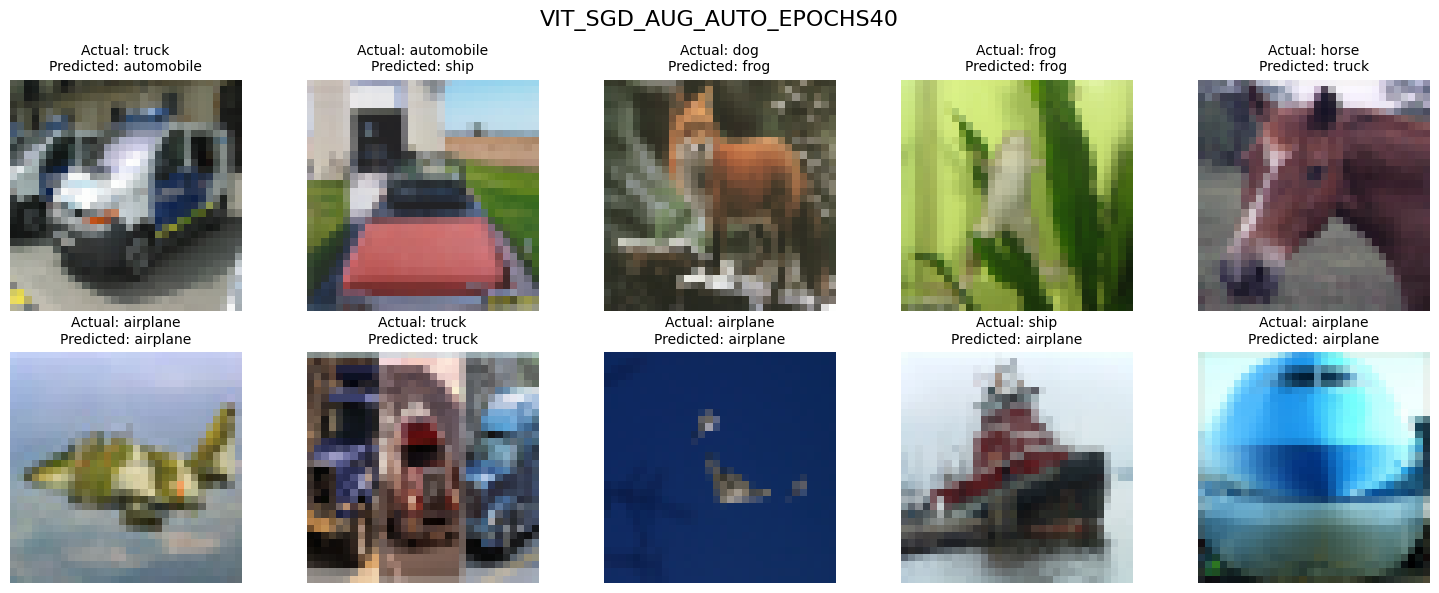

In [169]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)